# CS512 (AI) Lab Assignment - 2

###**Due on: 8th Nov 2023 2400 Hrs | Total Marks: 100**

**Submission Instructions**:

All submission is through google classroom submitting the colab (.ipynb file). In case you face any trouble with the submission, please contact the TAs:

*   Sushil Ghildiyal sushil.20csz0021@iitrpr.ac.in
*   Surbhi Madan, surbhi.19csz0011@iitrpr.ac.in
*   Armaan Garg, armaan.19csz0002@iitrpr.ac.in
*   Kapil Rana, 2018csz0007@iitrpr.ac.in
*   Rahul Narava, syam.21csz0018@iitrpr.ac.in




Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.



**Penalty Policy**: Late submissions will attract penalties. There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. for 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.

All the plots and observations should be added to the colab notebook itself.

**Naming Convention**:

Name the colab file submission as follows: Name_rollnumber_Labnumber.ipynb
E.g. if your name is ABC, roll number is 2019csx1234 and submission is for assignment2 then you should name the colab file as: ABC_2019csx1234_Lab2.ipynb


# Q1: Gibbs Sampling

Consider a data set on the heights of 695 women and 562 men.
Suppose we have the list of heights, but we don’t know which data
points are from women and which are from men. The data points are available [here](https://drive.google.com/file/d/1_sweLfvqtqdy6oRuAKAG9Le3H-LWaFVK/view?usp=sharing).
The combined distribution of all 1257 heights is shown below.

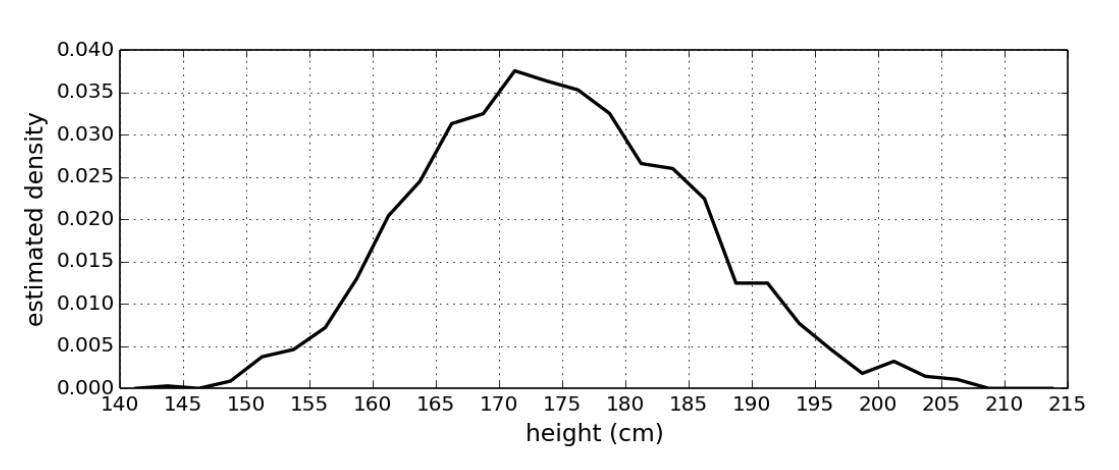

Consider that the combined height distribution is a two-component mixture of Normals, and there is an (essentially) unique set of mixture parameters
corresponding to each particular distribution.

To find individual distributions, let us consider a variable $Z_i$ that
indicates whether the subject i is female or male.
The mixture distribution can be specified as:

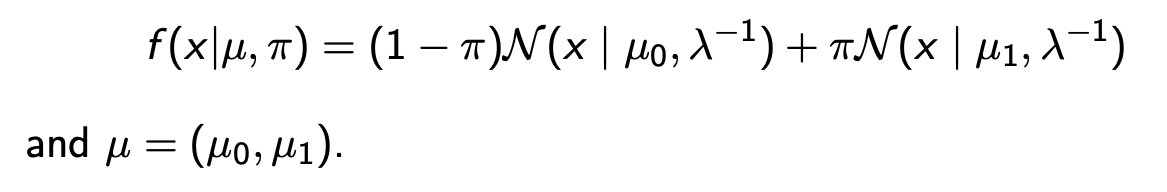

The full conditional distribution i.e. p($x_{1:n}$|µ, π) is a complicated function of µ and π, making the posterior difficult to sample from directly. Hence, we are going to use Gibbs sampling method to make our estimate for the individual components of the height gaussians.

The conditional distributions are specified as:

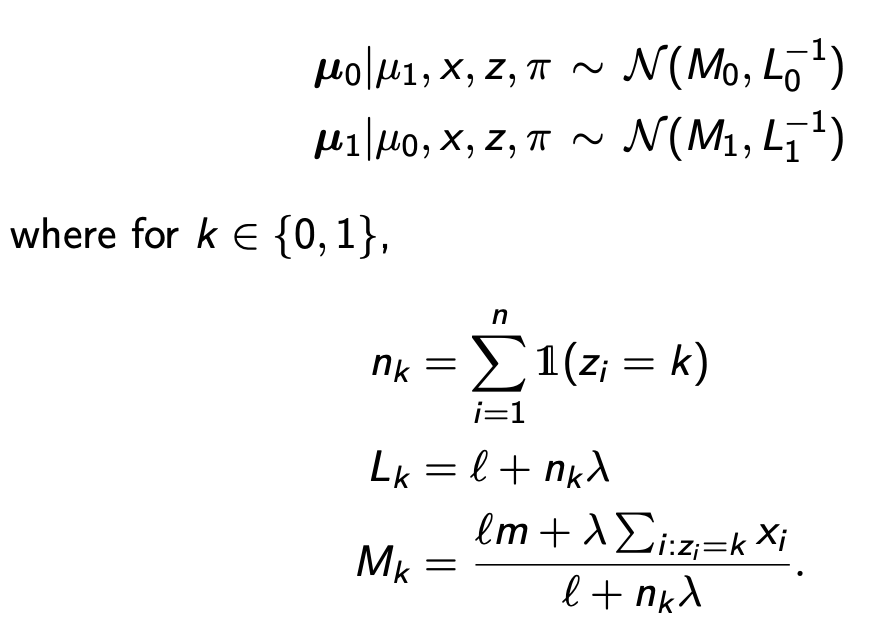

# $p(z|\mu, \pi, x)=$ 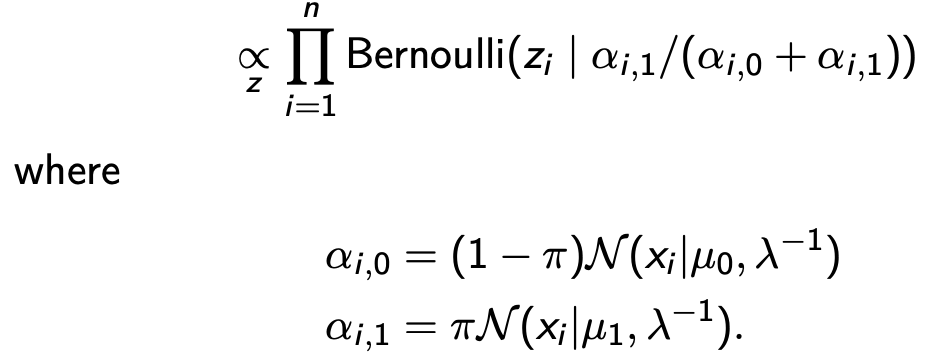

# $\pi = \frac{n_k}{n}$

The complete process can be specified as below:
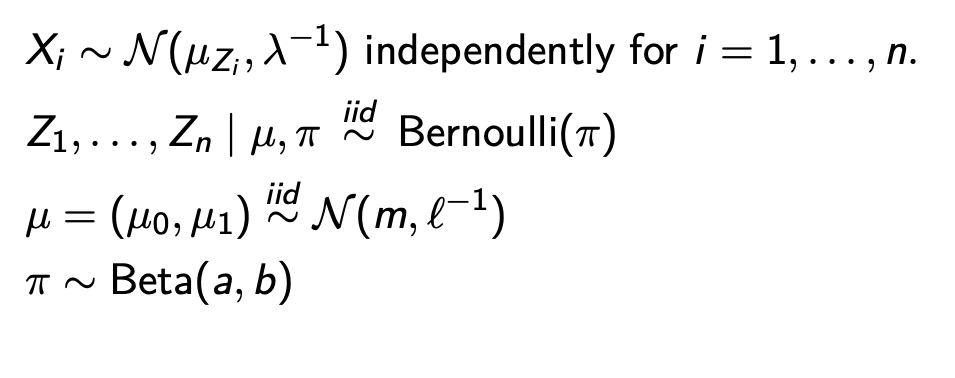

Consider the following initializations:

$\lambda = \frac{1}{\sigma^2}$ where $\sigma = 8$cm.

$m = 175 cm$

$l = \frac{1}{s^2}$ where $s = 15$cm.

a = 1, b = 1 (Beta parameters, equivalent to prior “sample
size” of 1 for each component)

$\pi = 0.5 $

$z_1, . . . , z_n$ are sampled i.i.d. from Bernoulli(1/2) (initial assignment
to components chosen uniformly at random)

$µ_0 = µ_1 = m$ (component means initialized to the mean of
their prior)

Q.1. Use a Gibbs Sampler given the conditionals and initializations provided above and plot the $µ_0, µ_1$ for 1000 samples. [10 marks]

Q.2. Plot the histograms of the heights of subjects assigned to each
component, according to $z_1, . . . , z_n$, in a typical sample after 1000 samples. [10 marks]

Q.3. Plot the $\pi$ for each iterations for both the components. [10 marks]

In [13]:
import numpy as np
import math
import csv
import random
import matplotlib.pyplot as plt

heights = []

with open('Height.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        height, num_people = int(row[0]), int(row[1])
        heights.extend([height] * num_people)

n = len(heights)

sigma = 8
lambda_val = 1 / (sigma ** 2)
m = 175
s = 15
l = 1 / (s ** 2)
a = 1
b = 1
pi = 0.5
pi1_itn = []
pi2_itn = []
mu0 = mu1 = m
mu0_itn = []
mu1_itn = []
z_samples = np.random.choice([0, 1], size=n)

def update_mu(x, k, z_samples, l, m, lambda_val):
    nk = 0
    sum_x = 0
    idx = 0
    for z in z_samples:
        if z == k:
            nk += 1
            sum_x += x[idx]
        idx += 1

    L_k = l + nk * lambda_val
    M_k = (l * m + lambda_val * sum_x) / (l + nk * lambda_val)

    return np.random.normal(M_k, 1/np.sqrt(L_k))

def calc_nk(k, z_samples):
    nk = 0
    for z in z_samples:
        if z == k:
            nk += 1
    return nk

def update_pi(a, b, z_samples):
    n0 = calc_nk(0, z_samples)
    n1 = calc_nk(1, z_samples)
    return np.random.beta(a=a+n1, b=b+n0)

def normal_pdf(x, mean, std):
    coefficient = 1 / (math.sqrt(2 * math.pi) * std)
    exponent = -((x - mean)**2) / (2 * std**2)
    pdf_value = coefficient * math.exp(exponent)
    return pdf_value

def update_z(x, lambda_val, pi, mu0, mu1):
    z_updated_samples = []
    for xi in x:
        alpha0 = (1 - pi) * normal_pdf(xi, mu0, 1 / math.sqrt(lambda_val))
        alpha1 = (pi) * normal_pdf(xi, mu1, 1 / math.sqrt(lambda_val))
        z_updated = np.random.binomial(1, alpha1 / (alpha0 + alpha1))
        z_updated_samples.append(z_updated)
    return z_updated_samples

itn = []
for i in range(1000):
    itn.append(i)

    gibbs = random.randint(0, 2)

    if gibbs == 0:
        z_samples = update_z(heights, lambda_val, pi, mu0, mu1)
    elif gibbs == 1:
        pi = update_pi(a, b, z_samples)
    else:
        mu0 = update_mu(heights, 0, z_samples, l, m, lambda_val)
        mu1 = update_mu(heights, 1, z_samples, l, m, lambda_val)

    pi1_itn.append(pi)
    pi2_itn.append(1-pi)
    mu0_itn.append(mu0)
    mu1_itn.append(mu1)


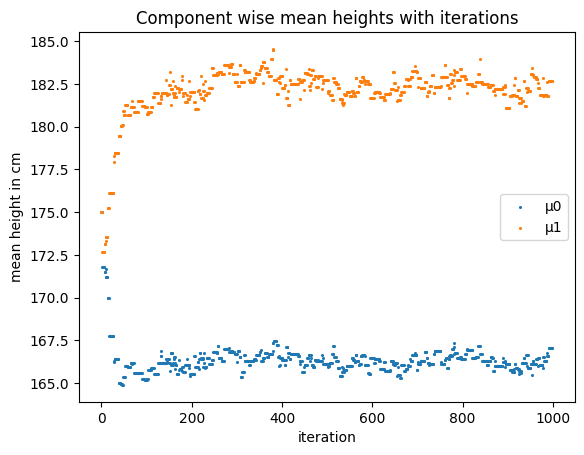

In [14]:
plt.scatter(itn, mu0_itn, label='µ0', s=1.5)
plt.scatter(itn, mu1_itn, label='µ1', s=1.5)
plt.xlabel('iteration')
plt.ylabel('mean height in cm')
plt.title('Component wise mean heights with iterations')
plt.legend(loc='right')
plt.show()

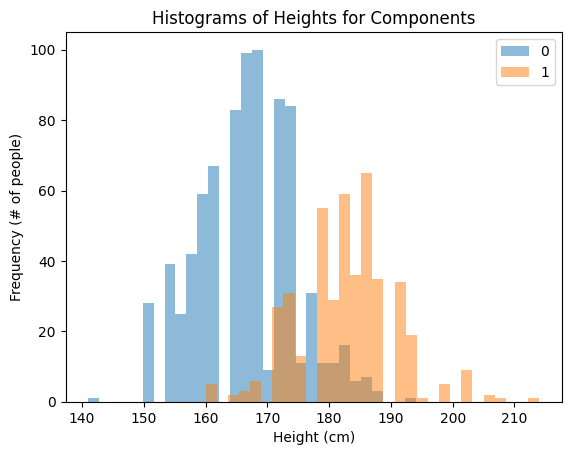

In [15]:
plt.hist([heights[i] for i in range(len(z_samples)) if z_samples[i] == 0], bins=30, alpha=0.5, label='0')
plt.hist([heights[i] for i in range(len(z_samples)) if z_samples[i] == 1], bins=30, alpha=0.5, label='1')
plt.title('Histograms of Heights for Components')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency (# of people)')
plt.legend()
plt.show()

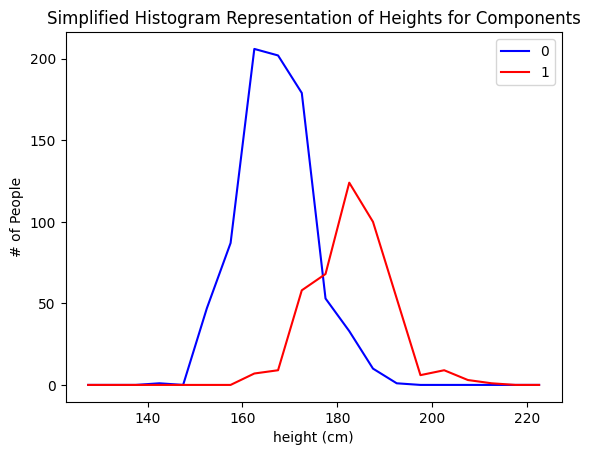

In [16]:
bins = np.arange(125, 230, 5)

counts_component_0 = np.zeros(len(bins) - 1)
counts_component_1 = np.zeros(len(bins) - 1)

for z, height in zip(z_samples, heights):
    bin_index = np.digitize(height, bins) - 1
    if z == 0:
        counts_component_0[bin_index] += 1
    else:
        counts_component_1[bin_index] += 1

bin_centers = (bins[:-1] + bins[1:]) / 2

plt.plot(bin_centers, counts_component_0, label='0', color='blue')
plt.plot(bin_centers, counts_component_1, label='1', color='red')

plt.xlabel('height (cm)')
plt.ylabel('# of People')
plt.legend(loc='upper right')
plt.title('Simplified Histogram Representation of Heights for Components')
plt.show()

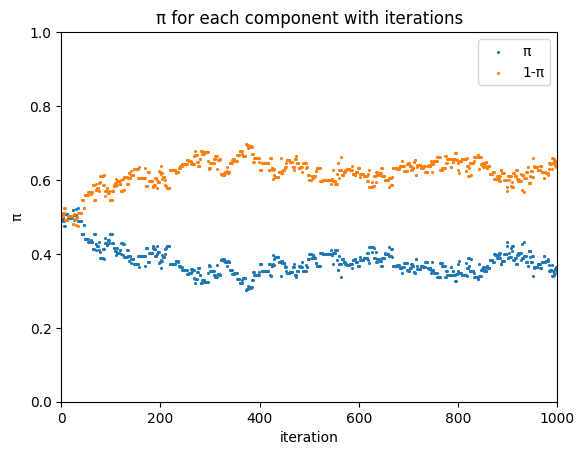

In [18]:
plt.scatter(itn, pi1_itn, s=1.5, label='π')
plt.scatter(itn, pi2_itn, s=1.5, label='1-π')
plt.xlabel('iteration')
plt.ylabel('π')
plt.legend(loc='upper right')
plt.xlim(left=0, right=1000)
plt.ylim(bottom=0, top=1)
plt.title('π for each component with iterations')
plt.show()

# Q2: Particle Filter Simulation for Robot Localization

A traveller needs to locate its beloved robot in an unkwown city, but luckly he has a tool that provides the data from the sensors of the robot, but the sensors are not perfect and can provide noisy measurements (the noise information is provided in the code below). Your task is to help the traveller by implementing a Particle Filter algorithm to accurately localize the zone of the robot within the city.


zone = [

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['2', '2', '2', '4', '4', '4', '4', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9']
]

environment = [

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E'],
    
    ['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']
]

In the give environment, 'S' denotes the location of the robot and W denotes walls.




**Transition function**

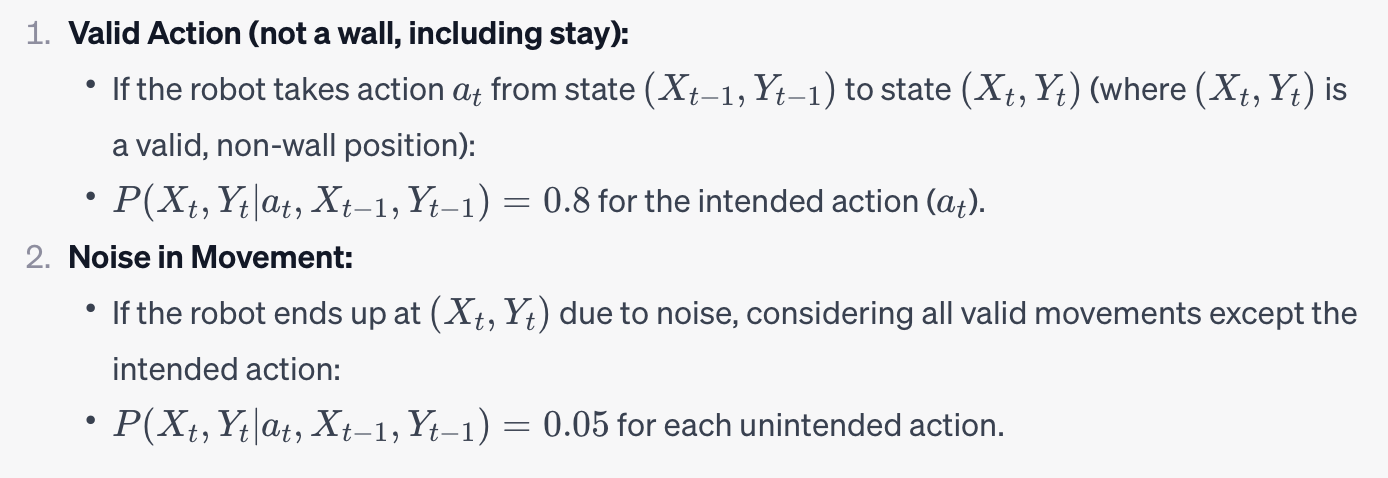

The observation probability P($z_t | x_t, y_t$) represents the probability of the sensor measurement $z_t$ given the true position $x_t, y_t$. The observation probability is 1 indicating that the sensor always detects the true state of the system without any errors, noise, or uncertainty.


**Wrtie a function for the random movement of the robot at each time-step where the action set is {N,S,E,W, stay} where each action is equally likely.**

**[PART 1]** Implement the Particle Filter algorithm (take 5 particles, randomly initialized at empty locations) to localize the robot by estimating its zone after every 10 iterations, till correct zone is located or upto max 100 iterations **[15 marks]**

**Note: Use the 8 neighbouring cells correspoding to the robot and each particle to measure their likehood.**

Example:

Robot (where S denotes the robot)

[E E E]

[W S W]

[E E E]


Particle (where P denotes the particle)

[E E E]

[W P E]

[E E E]

The likelihood of this particle being in the same zone as the robot is 7/8 as their is similarity of 7 neighbouring cells out of 8 based on the sensed infromation.


**[PART 2]** Heatmap: Create a heatmap of the grid where colors represent the probability or weight associated with different cells. Darker colors indicate higher probabilities, providing a visual representation of the confidence in different areas of the grid. **[15 marks]**

Robot Location -  (1, 6)
Robot Zone -  4
Zone wise heatmap


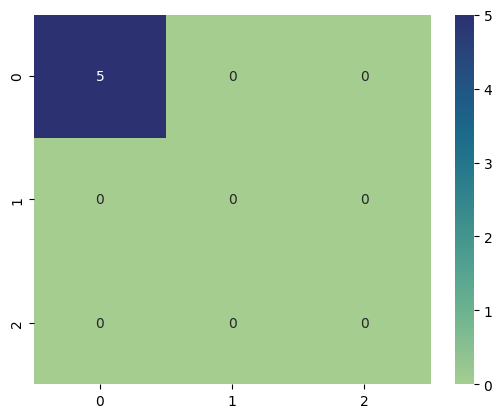

10  iterations complete


Robot Location -  (0, 4)
Robot Zone -  4
Zone wise heatmap


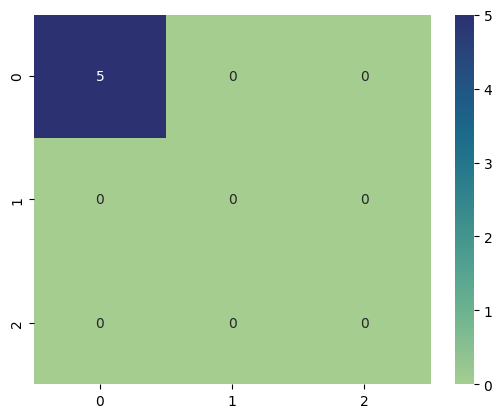

20  iterations complete


Robot Location -  (2, 6)
Robot Zone -  4
Zone wise heatmap


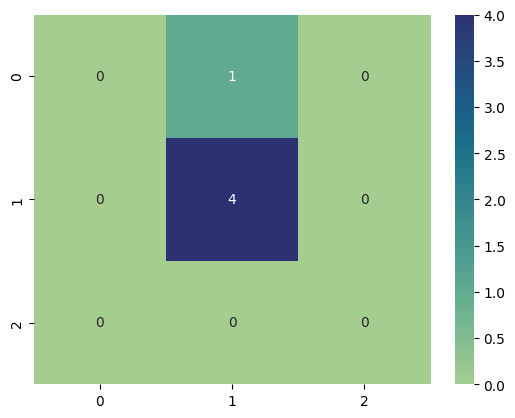

30  iterations complete


Robot Location -  (1, 8)
Robot Zone -  7
Zone wise heatmap


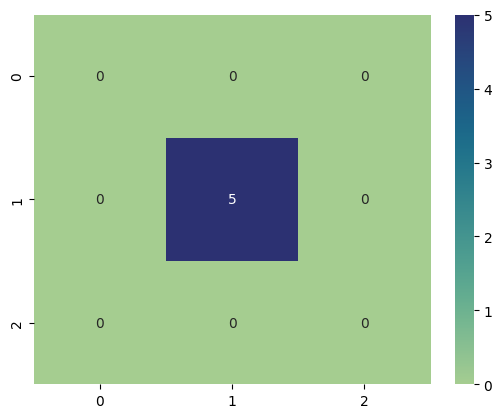

40  iterations complete


Robot Location -  (0, 6)
Robot Zone -  4
Zone wise heatmap


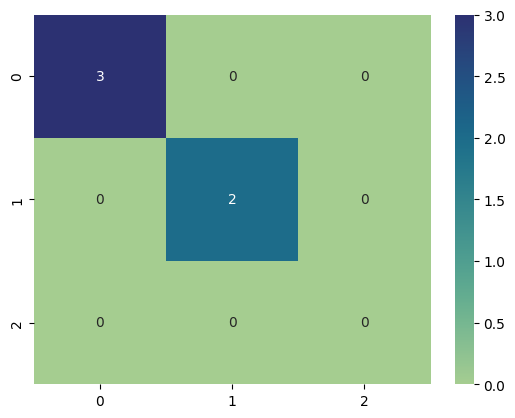

50  iterations complete


Robot Location -  (2, 3)
Robot Zone -  4
Zone wise heatmap


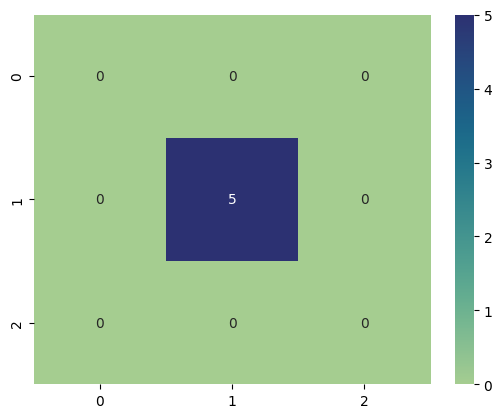

60  iterations complete


Robot Location -  (4, 5)
Robot Zone -  5
Zone wise heatmap


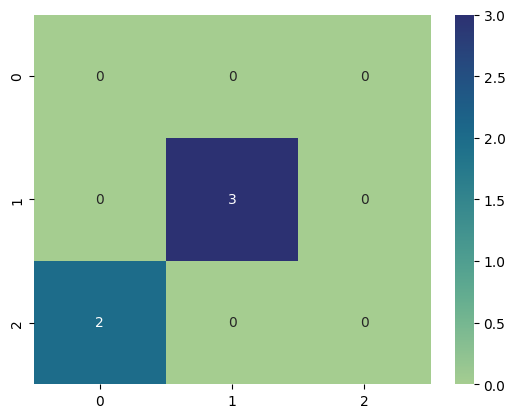

70  iterations complete


Robot Location -  (3, 6)
Robot Zone -  4
Zone wise heatmap


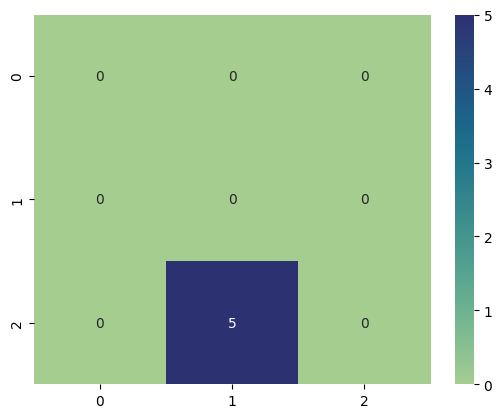

80  iterations complete


Robot Location -  (4, 8)
Robot Zone -  8
Zone wise heatmap


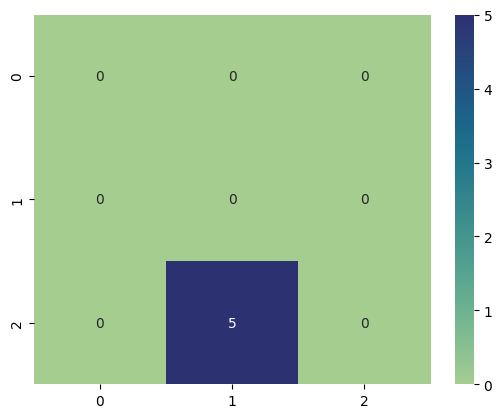

90  iterations complete


Robot Location -  (3, 9)
Robot Zone -  8
Zone wise heatmap


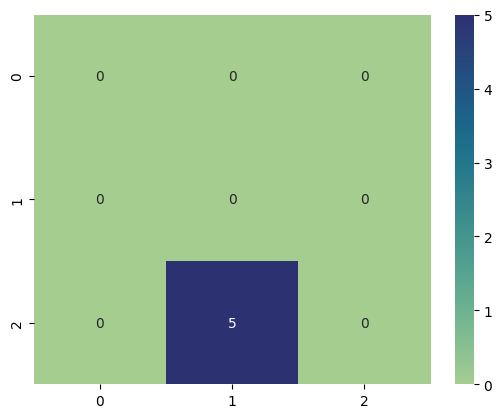

100  iterations complete




In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

zone = [['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],
        ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],
        ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],
        ['2', '2', '2', '4', '4', '4', '4', '8', '8', '8'],
        ['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],
        ['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],
        ['2', '2', '2', '5', '5', '5', '5', '9', '9', '9'],
        ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],
        ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],
        ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9']]

environment = [['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'],
        ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
        ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
        ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],
        ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],
        ['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E'],
        ['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E'],
        ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E'],
        ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E'],
        ['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']]

NUM_PARTICLES = 5
MAX_ITERATIONS = 100

def initialize_particles():
    particles = []

    empty_positions = [(i, j) for i in range(len(zone)) for j in range(len(zone[0])) if (environment[i][j] == 'E' or environment[i][j] == 'S')]
    selected_positions = random.sample(empty_positions, NUM_PARTICLES)

    for x, y in selected_positions:
        particles.append({'x': x, 'y': y})

    return particles

def get_robot_loc():
    x, y = 0, 0
    for i in range(len(environment)):
        for j in range(len(environment[0])):
            if environment[i][j] == 'S':
                x, y = i, j
    return x, y

def get_robot_action(Sx, Sy):
    actions = [[Sx - 1, Sy, 'W'], [Sx + 1, Sy, 'E'], [Sx, Sy - 1, 'S'], [Sx, Sy + 1, 'N'], [Sx, Sy, 'St']]
    chosen_action = random.choice(actions)
    return chosen_action

def add_noise(chosen_action, Sx, Sy):
    actions = [[Sx - 1, Sy, 'W'], [Sx + 1, Sy, 'E'], [Sx, Sy - 1, 'S'], [Sx, Sy + 1, 'N'], [Sx, Sy, 'St']]
    weighted_actions = []
    for action in actions:
        if action == chosen_action:
            weight = 0.8
        else:
            weight = 0.05
        weighted_actions.append((action, weight))

    action_final = random.choices(weighted_actions, weights=[weight for _, weight in weighted_actions])[0][0]
    return action_final

def add_noise_particles(dir, Sx, Sy):
    actions = ['W', 'E', 'S', 'N', 'St']
    weighted_actions = []
    for action in actions:
        if action == dir:
            weight = 0.8
        else:
            weight = 0.05
        weighted_actions.append((action, weight))

    action_final = random.choices(weighted_actions, weights=[weight for _, weight in weighted_actions])[0][0]
    if action_final == 'W':
        return [Sx-1, Sy]
    if action_final == 'E':
        return [Sx+1, Sy]
    if action_final == 'S':
        return [Sx, Sy-1]
    if action_final == 'N':
        return [Sx, Sy+1]
    return [Sx, Sy]

def invalid_action_env(x, y):
    if x<0 or x>=len(environment) or y<0 or y>=len(environment[0]) or environment[x][y] == 'W':
        return True
    else:
        return False

def perform_action_robot(action_final, Sx, Sy):
    x, y = action_final[0], action_final[1]
    if invalid_action_env(x, y):
        return Sx, Sy
    else:
        return x, y

def invalid_action(x, y):
    if x<0 or x>=len(environment) or y<0 or y>=len(environment[0]):
        return True
    else:
        return False

def perform_action_particle(action_final_particle, Px, Py):
    x, y = action_final_particle[0], action_final_particle[1]
    if invalid_action_env(x, y):
        return Px, Py
    else:
        return x, y

def particle_weight(Sx, Sy, Px, Py):
    surrounding_cells_robot = [
        (Sx-1, Sy-1), (Sx-1, Sy), (Sx-1, Sy+1),
        (Sx, Sy-1), (Sx, Sy+1),
        (Sx+1, Sy-1), (Sx+1, Sy), (Sx+1, Sy+1)
    ]
    surrounding_cells_particle = [
        (Px-1, Py-1), (Px-1, Py), (Px-1, Py+1),
        (Px, Py-1), (Px, Py+1),
        (Px+1, Py-1), (Px+1, Py), (Px+1, Py+1)
    ]

    _match = 0
    for i in range(8):
        sx, sy = surrounding_cells_robot[i]
        px, py = surrounding_cells_particle[i]
        if (sx < 0 and px < 0) or (sx >= len(environment) and px >= len(environment)):
            _match += 1
        elif (sy < 0 and py < 0) or (sy >= len(environment[0]) and py >= len(environment[0])):
            _match += 1
        elif invalid_action(sx, sy) == False and invalid_action(px, py) == False and environment[sx][sy] == environment[px][py]:
            _match += 1

    return _match / 8.0

def generate_heatmap(particles):
    heatmap = [[0 for _ in range(3)] for _ in range(3)]

    for particle in particles:
        x, y = particle['x'], particle['y']
        if zone[x][y] == '1':
            heatmap[0][0] += 1
        if zone[x][y] == '2':
            heatmap[1][1] += 1
        if zone[x][y] == '3':
            heatmap[2][0] += 1
        if zone[x][y] == '4':
            heatmap[0][1] += 1
        if zone[x][y] == '5':
            heatmap[1][1] += 1
        if zone[x][y] == '6':
            heatmap[2][1] += 1
        if zone[x][y] == '7':
            heatmap[0][2] += 1
        if zone[x][y] == '8':
            heatmap[1][2] += 1
        if zone[x][y] == '9':
            heatmap[2][2] += 1

    Sx, Sy = get_robot_loc()
    robot_zone = zone[Sx][Sy]

    return heatmap, robot_zone

def converged(particles):
    Sx, Sy = get_robot_loc()
    robot_zone = zone[Sx][Sy]

    particle_count = 0
    for particle in particles:
        x, y = particle['x'], particle['y']
        if zone[x][y] == robot_zone:
            particle_count += 1

    if particle_count>=3:
        return True
    return False

particles = initialize_particles()

for iteration in range(MAX_ITERATIONS):

    Sx, Sy = get_robot_loc()

    chosen_action = get_robot_action(Sx, Sy)
    action_final = add_noise(chosen_action, Sx, Sy)
    environment[Sx][Sy] = 'E'
    new_Sx, new_Sy = perform_action_robot(action_final, Sx, Sy)
    environment[new_Sx][new_Sy] = 'S'

    update_particles = []
    for particle in particles:
        action_final_particle = add_noise_particles(chosen_action[2], particle['x'], particle['y'])
        x, y = perform_action_particle(action_final_particle, particle['x'], particle['y'])
        update_particles.append({'x': x, 'y': y})

    weights = []
    for particle in update_particles:
        weights.append(particle_weight(new_Sx, new_Sy, particle['x'], particle['y']))

    sum_weights = sum(weights)
    norm_weights = [w / sum_weights for w in weights]

    particles = np.random.choice(update_particles, NUM_PARTICLES, norm_weights)

    if iteration % 10 == 9:
        heatmap, robot_zone = generate_heatmap(particles)
        heatmap = np.array(heatmap)
        print('Robot Location - ', get_robot_loc())
        print('Robot Zone - ', robot_zone)
        print('Zone wise heatmap')
        sns.heatmap(heatmap, cmap="crest", annot=True)
        plt.show()
        if converged(particles):
            print('Converged - ', iteration + 1, ' iterations')
            break
        print(iteration + 1, ' iterations complete\n\n')


# Question 3: X-Men MDP

Most of the X-Men are mutants, a subspecies of humans who are born with superhuman abilities activated by the "X-Gene". The X-Men fight for peace and equality between normal humans and mutants in a world where anti-mutant bigotry is fierce and widespread. They are led by Charles Xavier, also known as Professor X, a powerful mutant telepath who can control and read minds. Their archenemy is Magneto, a powerful mutant with the ability to manipulate and control magnetic fields who leads the Brotherhood of Mutants. Both have opposing views and philosophies regarding the relationship between mutants and humans. While the former works towards peace and understanding between mutants and humans, the latter views humans as a threat and believes in taking an aggressive approach against them.

Jean Grey is one of the most beloved X-Men. But when a mission goes wrong, Jean is exposed to a dark and ancient power. This power has destroyed everything it comes in contact with, until her. Now that this power is becoming unstable, she releases it with destruction and anger. Now that this foreign power is consuming her, and the world is threatened, the X-Men have to face an important truth: they must save either the world, or their friend who threatens it. Magneto calls her ‘The phoenix’ and intends to use her to declare war against humanity.

In this question, you will use some algorithms to compute optimal policies in Markov decision processes (MDP’s) to help wolverine escape from Magneto while trying to find Jean in order to kill her.

You are given the following grid world where Wolverine and other mutants from Xavier's School for Gifted Youngsters live along with Magneto and his brotherhood of mutants.




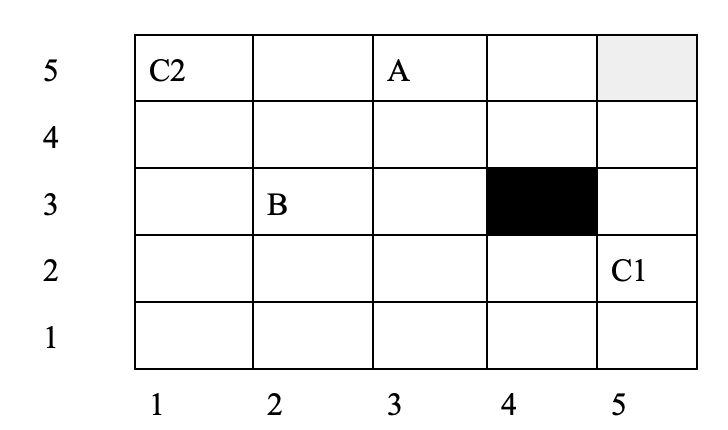

The wolverine (A) can occupy any of the 24 blank squares. The Magneto (B) also can occupy any square, except for square (5,5) which is Xavier’s school of Gifted Youngsters. Jean which can be at C1(5,2) or C2(1,5). Currently, she is at (5,2). Thus, MDP has 24*23*2 = 1104 states.

Wolverine and Magneto can each move one square in any direction - Up,down,left and right but not diagonal. They also can choose not to move at all. (4,3) is blocked due to the wall. Thus, there are 5 possible moves from each square. If an action is attempted that causes the characters(Wolverine and Magneto) to bump into a wall, then simply stay at the same location. In this problem, we will always take the point of view of the wolverine.

Reward Policies:

When Wolverine is at Jean’s place, it receives a reward of +20.
When Magneto is at Wolverine’s place, Wolverine receives a reward of -20.
When the Magneto is at wolverine’s place and wolverine is at jean’s place, the reward is -15.

All other configurations have a reward of 0.
Thus, the wolverine is trying to kill Jean while simultaneously avoiding the Magneto.

Jean is always available in exactly one of the two locations listed above. At every time step, Jean remains where she is with 80% probability. With 20% probability, Jean vanishes and reappears at another location.

States are encoded as six tuples, the first two numbers indicating the position of Magneto, the second two numbers the position of Wolverine, and the last two numbers the position of Jean. Thus, 2:3:3:5:5:2 indicates, as depicted in the figure above, that Magneto is in (2,3), Wolverine is in (3,5), and Jean is in (5,2). Magneto and wolverine take alternate moves. However, in encoding the MDP, we collapse both moves into a single state transition. In addition, Jean, when she moves, does so simultaneously with the wolverine's move. For instance, from the configuration above, if the wolverine moves to (2,5) and the Magneto responds by moving to (2,4), while jean moves to (1,5), this all would be encoded as a single transition from state 2:3:3:5:5:2 to 2:4:2:5:1:5.

The Wolverine and Magneto have 4 actions available ('UP', 'RIGHT', 'DOWN' and 'LEFT'). Each action moves the Wolverine/Magneto in its direction with probability 0.95. When the wolverine tries to move outside of the grid, the action will have no effect with probability 1. Staying in its own state will happen with probability 0.05.

We will consider two versions of Magneto:

In first version, Magneto is dumb and lazy, simply wanders randomly around its environment choosing randomly among its available actions at every step.
In the second version, Magneto is intelligent and active. Here, Magneto always heads straight for wolverine following the shortest path possible. Thus, after wolverine makes its move, Magneto chooses the action that will move it as close as possible to the wolverine's new position. (If there is a tie among the Magneto's best available options, the Magneto chooses randomly among these equally good best actions.)
    
For both versions of Magneto, your job will be to compute the wolverine's optimal policy, i.e. the action that should be taken at each state to maximize the wolverine's expected discounted reward, where we fix the discount factor (gamma) to be 0.85.

**Task 1:** Implement value iteration for both versions of Magneto on MDP [10 points]

**Task 2:** Implement policy iteration for both versions of Magneto [10 points]

**Task 3:** Implement and visualize the MDP board and strategy (policy) graphically [10 points]

**Task 4:** Compare the results for all the four approaches - Value iteration for lazy Magneto, Value iteration for active Magneto, Policy iteration for lazy Magneto, Policy iteration for active Magneto with proper tables/graphs/statistics. Comment which one is best among all the four mentioned approaches. [10 points]



## Value iteration for lazy Magneto

In [40]:
import numpy as np
from random import randint, seed, random
from tqdm import tqdm
import time
import copy

seed(0)

blocked_square = (4, 3)
xavier_school = (5, 5)
grid_dim = 5
jean_positions = [(5, 2), (1, 5)]
moves_list = [(1, 0), (0, 1), (0, -1), (-1, 0)]

class Jean(object):
    def __init__(self):
        _pos_1 = (5, 2)
        _pos_2 = (1, 5)
        self.possible_position = [_pos_1, _pos_2]
        _rand = randint(0, 1)
        self.pos_bool = _rand

    def get_current_position(self):
        return self.possible_position[self.pos_bool]

    def next_move(self):
        if random() >= 0.9:
            self.pos_bool = 1 - self.pos_bool

        return self.get_current_position()

class LazyMagneto(object):
    def __init__(self):
        _pos_1 = randint(1, 5)
        _pos_2 = randint(1, 5)
        self.pos = (_pos_1, _pos_2)
        while True:
            if self.check_valid_move(self.pos) == False:
                _pos_1 = randint(1, 5)
                _pos_2 = randint(1, 5)
                self.pos = (_pos_1, _pos_2)
            else:
                break
        self.possible_moves = [(1, 0), (0, 1), (0, -1), (-1, 0)]

    def check_valid_move(self, next_pos):
        if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != xavier_school and next_pos != blocked_square:
            return True
        return False

    def get_current_position(self):
        return self.pos

    def next_move(self):
        while True:
            _pos = randint(0, len(self.possible_moves) - 1)
            next_move = self.possible_moves[_pos]
            next_pos = tuple(i + j for i, j in zip(next_move, self.pos))
            if self.check_valid_move(next_pos):
                break

        if random() <= 0.95:
            self.pos= next_pos

        return self.get_current_position()

def check_valid_move_wolverine(next_pos):
    if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square:
        return True
    return False

def check_valid_move_magneto(next_pos):
    if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square and next_pos!= xavier_school:
        return True
    return False

class MDP:
    def __init__(self):
        self.converge_eps = 1e-1
        self.discount = 0.85
        self.movement_prob = 0.95
        self.jean_movement_prob = 0.2

        self.states = {}
        self.policy = {}
        self.is_end_state = {}

        for magneto_i in range(1, grid_dim+1):
            for magneto_j in range(1, grid_dim+1):
                if (magneto_i, magneto_j) == xavier_school or (magneto_i, magneto_j) == blocked_square:
                    continue
                for wolverine_i in range(1, grid_dim+1):
                    for wolverine_j in range(1, grid_dim+1):
                        if (wolverine_i, wolverine_j) != blocked_square:
                            for jean_pos in jean_positions:
                                state_key = (magneto_i, magneto_j, wolverine_i, wolverine_j, ) + jean_pos
                                is_end_state_key = state_key

                                if (wolverine_i, wolverine_j) == jean_pos:
                                    if magneto_i != wolverine_i or magneto_j != wolverine_j:
                                        self.states[state_key] = 20
                                    elif magneto_i == wolverine_i and magneto_j == wolverine_j:
                                        self.states[state_key] = -15
                                    else:
                                        self.states[state_key] = -20
                                    self.is_end_state[is_end_state_key] = 1
                                else:
                                    self.states[state_key] = 0
                                    self.is_end_state[is_end_state_key] = 0

    def check_valid_move_wolverine(self, next_pos):
        if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square:
            return True
        return False

    def check_valid_move_magneto(self, next_pos):
        if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square and next_pos!= xavier_school:
            return True
        return False

    def train(self):
        states_temp = {}
        max_iterations = int(1e5)

        print("Training...")
        for _ in tqdm(range(max_iterations)):
            converged = True
            for key in self.states.keys():
                if self.is_end_state[key] != 1:
                    possible_s = []
                    possible_act = []
                    for action in moves_list:
                        magneto_pos = (key[0], key[1])
                        wolverine_pos = (key[2], key[3])
                        jean_pos = (key[4], key[5])

                        next_wolverine_pos = tuple(i + j for i, j in zip(wolverine_pos, action))
                        if self.check_valid_move_wolverine(next_wolverine_pos) == True:
                            q_sa = 0

                            count_valid_mag_moves = sum(
                                1 for mag_action in moves_list
                                if self.check_valid_move_magneto(tuple(i + j for i, j in zip(magneto_pos, mag_action)))
                            )

                            for mag_action in moves_list:
                                transition_prob = self.movement_prob * self.movement_prob / count_valid_mag_moves

                                for jean_action in jean_positions:
                                    next_magneto_pos = tuple(i + j for i, j in zip(magneto_pos, mag_action))

                                    if self.check_valid_move_magneto(next_magneto_pos):
                                        if jean_pos != jean_action:
                                            transition_prob*=self.jean_movement_prob
                                            next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                        else:
                                            transition_prob*=(1-self.jean_movement_prob)
                                            next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                        if self.is_end_state[next_state] == False:
                                            q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                        else:
                                            q_sa  += transition_prob*(self.states[next_state] + 0)

                            transition_prob = self.movement_prob*(1-self.movement_prob)
                            for jean_action in jean_positions:
                                next_magneto_pos = magneto_pos

                                if jean_pos != jean_action:
                                    transition_prob*=self.jean_movement_prob
                                    next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                else:
                                    transition_prob*=(1-self.jean_movement_prob)
                                    next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                if self.is_end_state[next_state] == False:
                                    q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                else:
                                    q_sa  += transition_prob*(self.states[next_state] + 0)

                            for mag_action in moves_list:
                                transition_prob = (1-self.movement_prob)*self.movement_prob/count_valid_mag_moves

                                for jean_action in jean_positions:
                                    next_magneto_pos = tuple(i + j for i, j in zip(magneto_pos, mag_action))

                                    if self.check_valid_move_magneto(next_magneto_pos):
                                        if jean_pos != jean_action:
                                            transition_prob*=self.jean_movement_prob
                                            next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                        else:
                                            transition_prob*=(1-self.jean_movement_prob)
                                            next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                        if self.is_end_state[next_state] == False:
                                            q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                        else:
                                            q_sa  += transition_prob*(self.states[next_state] + 0)

                            transition_prob = (1-self.movement_prob)*(1-self.movement_prob)
                            for jean_action in jean_positions:
                                next_magneto_pos = magneto_pos

                                if jean_pos != jean_action:
                                    transition_prob*=self.jean_movement_prob
                                    next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                else:
                                    transition_prob*=(1-self.jean_movement_prob)
                                    next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                if self.is_end_state[next_state] == False:
                                    q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                else:
                                    q_sa  += transition_prob*(self.states[next_state] + 0)

                            possible_s.append(q_sa)
                            possible_act.append(action)

                    max_possible_s = max(possible_s)
                    states_temp[key] = max_possible_s
                    idx = possible_s.index(max_possible_s)

                    self.policy[key] = possible_act[idx]
                else:
                    states_temp[key] = self.states[key]
                    self.policy[key] = None

            for key in self.states.keys():
                if abs(states_temp[key] - self.states[key]) > self.converge_eps:
                    converged = False
                    break

            if converged == True:
                print("Converged")
                break
            self.states = copy.deepcopy(states_temp)

    def get_next_move(self, magneto_pos, wolverine_pos, jean_pos):
        state = magneto_pos + wolverine_pos + jean_pos
        return self.policy[state]

def find_winner(jean_position, magneto_position, wolverine_position):
    if jean_position != magneto_position and magneto_position == wolverine_position:
        return -1
    elif jean_position == magneto_position == wolverine_position:
        return 0
    elif jean_position == wolverine_position != magneto_position:
        return 1
    return -100

def draw_board(jean_position, magneto_position, wolverine_position):
    print("Jean Position:", jean_position)
    print("Magneto Position:", magneto_position)
    print("Wolverine Position:", wolverine_position)

    grid = [['0' for _ in range(grid_dim)] for _ in range(grid_dim)]

    def place_character(position, character):
        grid[position[0] - 1][position[1] - 1] = character # swap

    place_character(jean_position, 'J')
    place_character(wolverine_position, 'W')
    place_character(magneto_position, 'M')
    place_character(blocked_square, '-1')
    place_character(xavier_school, 'X')

    for row in grid:
        print(" ".join(row))
    print()

def trials(mdp, num_trials=100000):
    num_wolverine_wins = 0
    num_draws = 0
    num_magneto_wins = 0
    total_iterations = 0

    for _ in tqdm(range(num_trials)):
        max_iterations = int(1e6)
        jean = Jean()
        magneto = LazyMagneto()

        jean_position = jean.get_current_position()
        magneto_position = magneto.get_current_position()

        wolverine_position = get_valid_wolverine_position()

        for _ in range(max_iterations):
            result = find_winner(jean_position, magneto_position, wolverine_position)

            if result == -100:
                total_iterations += 1
                jean.next_move()
                magneto.next_move()
                jean_position = jean.get_current_position()
                magneto_position = magneto.get_current_position()
                next_move = mdp.get_next_move(magneto_position, wolverine_position, jean_position)

                if next_move is not None and random() <= 0.95:
                    wolverine_position = tuple(i + j for i, j in zip(wolverine_position, next_move))

            elif result == -1:
                num_magneto_wins += 1
                break
            elif result == 0:
                num_draws += 1
                break
            else:
                num_wolverine_wins += 1
                break

    print()
    print(f"Wolverine Wins: {num_wolverine_wins * 100 / num_trials}%")
    print(f"Draws: {num_draws * 100 / num_trials}%")
    print(f"Magneto Wins: {num_magneto_wins * 100 / num_trials}%")

    avg_reward = num_wolverine_wins * 20 + num_magneto_wins * -20 + num_draws * -15
    print(f"Avg Reward: {avg_reward / num_trials}")
    print(f"Avg Total Iterations: {total_iterations / num_trials}")

    trial_results_1.append(num_wolverine_wins * 100 / num_trials)
    trial_results_1.append(num_draws * 100 / num_trials)
    trial_results_1.append(num_magneto_wins * 100 / num_trials)

    trial_rewards_1.append(avg_reward / num_trials)
    trial_rewards_1.append(total_iterations / num_trials)

def play_game(mdp):
    max_iter = int(1e6)
    jean = Jean()
    magneto = LazyMagneto()

    jean_position = jean.get_current_position()
    magneto_position = magneto.get_current_position()

    wolverine_position = get_valid_wolverine_position()
    print("Initial Board")
    draw_board(jean_position, magneto_position, wolverine_position)

    result = find_winner(jean_position, magneto_position, wolverine_position)

    for iter_num in range(max_iter):
        result = find_winner(jean_position, magneto_position, wolverine_position)

        if result != -100:
            break
        else:
            jean_next_position = jean.next_move()
            magneto_next_position = magneto.next_move()
            result = find_winner(jean_next_position, magneto_next_position, wolverine_position)

            if result != -100:
                draw_board(jean_next_position, magneto_next_position, wolverine_position)
                break

            next_move = mdp.get_next_move(magneto_position, wolverine_position, jean_position)

            if next_move is not None and random() <= 0.95:
                wolverine_position = tuple(i + j for i, j in zip(wolverine_position, next_move))

            jean_position = jean.get_current_position()
            magneto_position = magneto.get_current_position()
            print(f"After move {iter_num + 1}")
            draw_board(jean_position, magneto_position, wolverine_position)

    print_result(result)

def get_valid_wolverine_position():
    while True:
        _pos_1 = randint(1, 5)
        _pos_2 = randint(1, 5)
        wolverine_position = (_pos_1, _pos_2)
        if check_valid_move_wolverine(wolverine_position):
            return wolverine_position

def print_result(result):
    if result == -1:
        print("Magneto Wins")
    elif result == 0:
        print("Draw")
    elif result == 1:
        print("Wolverine Wins")
    else:
        print("Iterations Ended")

trial_results_1 = []
trial_rewards_1 = []

if __name__ == "__main__":
    mdp = MDP()
    start = time.time()
    mdp.train()
    train_time = time.time() - start
    trial_rewards_1.append(train_time)
    play_game(mdp)
    trials(mdp)


Training...


  0%|          | 11/100000 [00:01<4:09:27,  6.68it/s]


Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (4, 1)
Wolverine Position: (3, 5)
0 0 0 0 J
0 0 0 0 0
0 0 0 0 W
M 0 -1 0 0
0 0 0 0 X

After move 1
Jean Position: (1, 5)
Magneto Position: (3, 1)
Wolverine Position: (2, 5)
0 0 0 0 J
0 0 0 0 W
M 0 0 0 0
0 0 -1 0 0
0 0 0 0 X

After move 2
Jean Position: (1, 5)
Magneto Position: (3, 2)
Wolverine Position: (1, 5)
0 0 0 0 W
0 0 0 0 0
0 M 0 0 0
0 0 -1 0 0
0 0 0 0 X

Wolverine Wins


100%|██████████| 100000/100000 [00:05<00:00, 17028.62it/s]


Wolverine Wins: 82.136%
Draws: 2.334%
Magneto Wins: 15.53%
Avg Reward: 12.9711
Avg Total Iterations: 6.37613


## Value iteration for active Magneto

In [41]:
import numpy as np
from random import randint, seed, choice
from tqdm import tqdm
import time
import copy

seed(1)

blocked_square = (4, 3)
xavier_school = (5, 5)
grid_dim = 5
jean_positions = [(5, 2), (1, 5)]
moves_list = [(1, 0), (0, 1), (0, -1), (-1, 0)]

def bfs(magneto_pos, wolverine_pos):
    starting_pos = magneto_pos
    ending_pos = wolverine_pos

    visited = np.zeros((grid_dim, grid_dim), dtype=np.uint8)
    visited[blocked_square[0] - 1][blocked_square[1] - 1] = 1
    visited[starting_pos[0] -1][starting_pos[1] - 1] = 1
    q = []
    q.append([starting_pos[0], starting_pos[1], 0])
    while(len(q)>0):
        front = q[0]
        q.pop(0)
        if((front[0], front[1]) == ending_pos):
            return front[2]

        for move in moves_list:
            temp = (front[0] + move[0], front[1] + move[1])
            if temp[0]< grid_dim+1 and temp[0]> 0 and temp[1] < grid_dim+1 and temp[1]> 0 and visited[temp[0]-1][temp[1]-1]== 0:
                q.append([temp[0], temp[1], front[2] + 1])
                visited[temp[0]-1][temp[1]-1] = 1

def check_valid_move_magneto(next_pos):
    if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != xavier_school and next_pos != blocked_square:
        return True
    return False

def next_magneto_move(magneto_position, wolverine_position):
    starting_pos = magneto_position
    list_dist = []
    for move in moves_list:
        if check_valid_move_magneto((starting_pos[0] + move[0], starting_pos[1] + move[1])) == True:
            dist = bfs((starting_pos[0] + move[0], starting_pos[1] + move[1]), wolverine_position)
            list_dist.append(dist)
        else:
            list_dist.append(1000)
    min_dist = min(list_dist)
    indices = [i for i in range(len(list_dist)) if list_dist[i] == min_dist]
    next_moves_list = [moves_list[i] for i in indices]
    return next_moves_list

class Jean(object):
    def __init__(self):
        _pos_1 = (5, 2)
        _pos_2 = (1, 5)
        self.possible_position = [_pos_1, _pos_2]
        _rand = randint(0, 1)
        self.pos_bool = _rand

    def get_current_position(self):
        return self.possible_position[self.pos_bool]

    def next_move(self):
        if random() >= 0.9:
            self.pos_bool = 1 - self.pos_bool

        return self.get_current_position()


class ActiveMagneto(object):
    def __init__(self):
        _pos_1 = randint(1, 5)
        _pos_2 = randint(1, 5)
        self.pos = (_pos_1, _pos_2)
        while True:
            if self.check_valid_move(self.pos) == False:
                _pos_1 = randint(1, 5)
                _pos_2 = randint(1, 5)
                self.pos = (_pos_1, _pos_2)
            else:
                break
        self.possible_moves = [(1, 0), (0, 1), (0, -1), (-1, 0)]

    def check_valid_move(self, next_pos):
        if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != xavier_school and next_pos != blocked_square:
            return True
        return False

    def get_current_position(self):
        return self.pos

    def bfs(self, magneto_pos, wolverine_pos):
        starting_pos = magneto_pos
        ending_pos = wolverine_pos

        visited = np.zeros((grid_dim, grid_dim), dtype=np.uint8)
        visited[blocked_square[0] - 1][blocked_square[1] - 1] = 1
        visited[starting_pos[0] -1][starting_pos[1] - 1] = 1
        q = []
        q.append([starting_pos[0], starting_pos[1], 0])
        while(len(q)>0):
            front = q[0]
            q.pop(0)
            if((front[0], front[1]) == ending_pos):
                return front[2]

            for move in moves_list:
                temp = (front[0] + move[0], front[1] + move[1])
                if temp[0]< grid_dim+1 and temp[0]> 0 and temp[1] < grid_dim+1 and temp[1]> 0 and visited[temp[0]-1][temp[1]-1]== 0:
                    q.append([temp[0], temp[1], front[2] + 1])
                    visited[temp[0]-1][temp[1]-1] = 1

    def next_move(self, wolverine_position):
        starting_pos = self.pos
        list_dist = []
        for move in moves_list:
            if self.check_valid_move((starting_pos[0] + move[0], starting_pos[1] + move[1])) == False:
                list_dist.append(1000)
            else:
                dist = self.bfs((starting_pos[0] + move[0], starting_pos[1] + move[1]), wolverine_position)
                list_dist.append(dist)
        min_dist = min(list_dist)
        indices = [i for i in range(len(list_dist)) if list_dist[i] == min_dist]

        rand_index = choice(indices)
        next_move = moves_list[rand_index]
        if random() <= 0.95:
            self.pos= (next_move[0] + self.pos[0], next_move[1] + self.pos[1])

        return self.pos

def check_valid_move_wolverine(next_pos):
    if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square:
        return True
    return False

class MDP:
    def __init__(self):
        self.converge_eps = 1e-1
        self.discount = 0.85
        self.movement_prob = 0.95
        self.jean_movement_prob = 0.2

        self.states = {}
        self.policy = {}
        self.is_end_state = {}

        for magneto_i in range(1, grid_dim+1):
            for magneto_j in range(1, grid_dim+1):
                if (magneto_i, magneto_j) == xavier_school or (magneto_i, magneto_j) == blocked_square:
                    continue
                for wolverine_i in range(1, grid_dim+1):
                    for wolverine_j in range(1, grid_dim+1):
                        if (wolverine_i, wolverine_j) != blocked_square:
                            for jean_pos in jean_positions:
                                state_key = (magneto_i, magneto_j, wolverine_i, wolverine_j, ) + jean_pos
                                is_end_state_key = state_key

                                if (wolverine_i, wolverine_j) == jean_pos:
                                    if magneto_i != wolverine_i or magneto_j != wolverine_j:
                                        self.states[state_key] = 20
                                    elif magneto_i == wolverine_i and magneto_j == wolverine_j:
                                        self.states[state_key] = -15
                                    else:
                                        self.states[state_key] = -20
                                    self.is_end_state[is_end_state_key] = 1
                                else:
                                    self.states[state_key] = 0
                                    self.is_end_state[is_end_state_key] = 0

    def check_valid_move_wolverine(self, next_pos):
        if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square:
            return True
        return False

    def check_valid_move_magneto(self, next_pos):
        if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square and next_pos!= xavier_school:
            return True
        return False

    def train(self):
        states_temp = {}
        max_iterations = int(1e5)

        print("Training......")
        for _ in tqdm(range(max_iterations)):
            converged = True
            for key in self.states.keys():
                if self.is_end_state[key] != 1:
                    possible_s = []
                    possible_act = []
                    for action in moves_list:
                        magneto_pos = (key[0], key[1])
                        wolverine_pos = (key[2], key[3])
                        jean_pos = (key[4], key[5])

                        next_wolverine_pos = tuple(i + j for i, j in zip(wolverine_pos, action))
                        if self.check_valid_move_wolverine(next_wolverine_pos) == True:
                            q_sa = 0

                            magneto_moves_list = next_magneto_move(magneto_pos, next_wolverine_pos)
                            count_valid_mag_moves = len(magneto_moves_list)

                            for mag_action in magneto_moves_list:
                                transition_prob = self.movement_prob*self.movement_prob/count_valid_mag_moves
                                for jean_action in jean_positions:
                                    next_magneto_pos = tuple(i + j for i, j in zip(magneto_pos, mag_action))
                                    if self.check_valid_move_magneto(next_magneto_pos):
                                        if jean_pos != jean_action:
                                            transition_prob*=self.jean_movement_prob
                                            next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                        else:
                                            transition_prob*=(1-self.jean_movement_prob)
                                            next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                        if self.is_end_state[next_state] == False:
                                            q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                        else:
                                            q_sa  += transition_prob*(self.states[next_state] + 0)

                            transition_prob = self.movement_prob*(1-self.movement_prob)
                            for jean_action in jean_positions:
                                next_magneto_pos = magneto_pos

                                if jean_pos != jean_action:
                                    transition_prob*=self.jean_movement_prob
                                    next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                else:
                                    transition_prob*=(1-self.jean_movement_prob)
                                    next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                if self.is_end_state[next_state] == False:
                                    q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                else:
                                    q_sa  += transition_prob*(self.states[next_state] + 0)

                            magneto_moves_list = next_magneto_move(magneto_pos, wolverine_pos)
                            count_valid_mag_moves = len(magneto_moves_list)

                            for mag_action in magneto_moves_list:
                                transition_prob = (1-self.movement_prob)*self.movement_prob/count_valid_mag_moves
                                for jean_action in jean_positions:
                                    next_magneto_pos = tuple(i + j for i, j in zip(magneto_pos, mag_action))
                                    if self.check_valid_move_magneto(next_magneto_pos):
                                        if jean_pos != jean_action:
                                            transition_prob*=self.jean_movement_prob
                                            next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                        else:
                                            transition_prob*=(1-self.jean_movement_prob)
                                            next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                        if self.is_end_state[next_state] == False:
                                            q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                        else:
                                            q_sa  += transition_prob*(self.states[next_state] + 0)

                            transition_prob = (1-self.movement_prob)*(1-self.movement_prob)
                            for jean_action in jean_positions:
                                next_magneto_pos = magneto_pos

                                if jean_pos != jean_action:
                                    transition_prob*=self.jean_movement_prob
                                    next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                else:
                                    transition_prob*=(1-self.jean_movement_prob)
                                    next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                if self.is_end_state[next_state] == False:
                                    q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                else:
                                    q_sa  += transition_prob*(self.states[next_state] + 0)

                            possible_s.append(q_sa)
                            possible_act.append(action)

                    max_possible_s = max(possible_s)
                    states_temp[key] = max_possible_s
                    idx = possible_s.index(max_possible_s)

                    self.policy[key] = possible_act[idx]
                else:
                    states_temp[key] = self.states[key]
                    self.policy[key] = None
                    continue

            for key in self.states.keys():
                if abs(states_temp[key] - self.states[key]) > self.converge_eps:
                    converged = False
                    # break
            if converged == True:
                print("Converged")
                break
            self.states = copy.deepcopy(states_temp)

    def get_next_move(self, magneto_pos, wolverine_pos, jean_pos):
        state = magneto_pos + wolverine_pos + jean_pos
        return self.policy[state]

def find_winner(jean_position, magneto_position, wolverine_position):
    if jean_position != magneto_position and magneto_position == wolverine_position:
        return -1
    elif jean_position == magneto_position == wolverine_position:
        return 0
    elif jean_position == wolverine_position != magneto_position:
        return 1
    return -100

def draw_board(jean_position, magneto_position, wolverine_position):
    print("Jean Position:", jean_position)
    print("Magneto Position:", magneto_position)
    print("Wolverine Position:", wolverine_position)

    grid = [['0' for _ in range(grid_dim)] for _ in range(grid_dim)]

    def place_character(position, character):
        grid[position[0] - 1][position[1] - 1] = character # swap

    place_character(jean_position, 'J')
    place_character(wolverine_position, 'W')
    place_character(magneto_position, 'M')
    place_character(blocked_square, '-1')
    place_character(xavier_school, 'X')

    for row in grid:
        print(" ".join(row))
    print()

def trials(mdp, num_trials = 100000):
    num_wolverine_wins = 0
    num_draws = 0
    num_magneto_wins = 0
    total_iterations = 0

    for _ in tqdm(range(num_trials)):
        max_iter = int(1e6)
        jean = Jean()
        magneto = ActiveMagneto()

        jean_position = jean.get_current_position()
        magneto_position = magneto.get_current_position()
        wolverine_position = get_valid_wolverine_position()

        for _ in range(max_iter):
            result = find_winner(jean_position, magneto_position, wolverine_position)
            if result == -100:
                total_iterations+=1
                jean.next_move()
                magneto.next_move(wolverine_position)
                jean_position = jean.get_current_position()
                magneto_position = magneto.get_current_position()
                next_move = mdp.get_next_move(magneto_position, wolverine_position, jean_position)

                if next_move is not None and random() <= 0.95:
                    wolverine_position = tuple(i + j for i, j in zip(wolverine_position, next_move))

            elif result ==-1:
                num_magneto_wins+=1
                break
            elif result == 0:
                num_draws+=1
                break
            else:
                num_wolverine_wins+=1
                break
    print()
    print(f"Wolverine Wins: {num_wolverine_wins * 100 / num_trials}%")
    print(f"Draws: {num_draws * 100 / num_trials}%")
    print(f"Magneto Wins: {num_magneto_wins * 100 / num_trials}%")

    avg_reward = num_wolverine_wins * 20 + num_magneto_wins * -20 + num_draws * -15
    print(f"Avg Reward: {avg_reward / num_trials}")
    print(f"Avg Total Iterations: {total_iterations / num_trials}")

    trial_results_2.append(num_wolverine_wins * 100 / num_trials)
    trial_results_2.append(num_draws * 100 / num_trials)
    trial_results_2.append(num_magneto_wins * 100 / num_trials)

    trial_rewards_2.append(avg_reward / num_trials)
    trial_rewards_2.append(total_iterations / num_trials)

def play_game(mdp):
    max_iter = int(1e6)
    jean = Jean()
    magneto = ActiveMagneto()

    jean_position = jean.get_current_position()
    magneto_position = magneto.get_current_position()
    wolverine_position = get_valid_wolverine_position()

    print("Initial Board")
    draw_board(jean_position, magneto_position, wolverine_position)

    result = find_winner(jean_position, magneto_position, wolverine_position)
    for iter_num in range(max_iter):
        result = find_winner(jean_position, magneto_position, wolverine_position)
        if result != -100:
            break
        else:
            jean_next_position = jean.next_move()
            magneto_next_position = magneto.next_move(wolverine_position)
            result = find_winner(jean_next_position, magneto_next_position, wolverine_position)
            if result != -100:
                draw_board(jean_next_position, magneto_next_position, wolverine_position)
                break
            next_move = mdp.get_next_move(magneto_position, wolverine_position, jean_position)

            if next_move is not None and random() <= 0.95:
                wolverine_position = tuple(i + j for i, j in zip(wolverine_position, next_move))

            jean_position = jean.get_current_position()
            magneto_position = magneto.get_current_position()
            print("After move ", iter_num+1)
            draw_board(jean_position, magneto_position, wolverine_position)

    print_result(result)

def get_valid_wolverine_position():
    while True:
        _pos_1 = randint(1, 5)
        _pos_2 = randint(1, 5)
        wolverine_position = (_pos_1, _pos_2)
        if check_valid_move_wolverine(wolverine_position):
            return wolverine_position

def print_result(result):
    if result == -1:
        print("Magneto Wins")
    elif result == 0:
        print("Draw")
    elif result == 1:
        print("Wolverine Wins")
    else:
        print("Iterations Ended")

trial_results_2 = []
trial_rewards_2 = []

if __name__ == "__main__":
    mdp = MDP()
    start = time.time()
    mdp.train()
    train_time = time.time() - start
    trial_rewards_2.append(train_time)
    play_game(mdp)
    trials(mdp)


Training......


  0%|          | 12/100000 [00:32<74:09:36,  2.67s/it]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (5, 1)
Wolverine Position: (3, 1)
0 0 0 0 0
0 0 0 0 0
W 0 0 0 0
0 0 -1 0 0
M J 0 0 X

After move  1
Jean Position: (5, 2)
Magneto Position: (4, 1)
Wolverine Position: (3, 2)
0 0 0 0 0
0 0 0 0 0
0 W 0 0 0
M 0 -1 0 0
0 J 0 0 X

After move  2
Jean Position: (5, 2)
Magneto Position: (3, 1)
Wolverine Position: (3, 3)
0 0 0 0 0
0 0 0 0 0
M 0 W 0 0
0 0 -1 0 0
0 J 0 0 X

After move  3
Jean Position: (5, 2)
Magneto Position: (3, 2)
Wolverine Position: (3, 4)
0 0 0 0 0
0 0 0 0 0
0 M 0 W 0
0 0 -1 0 0
0 J 0 0 X

After move  4
Jean Position: (5, 2)
Magneto Position: (3, 3)
Wolverine Position: (4, 4)
0 0 0 0 0
0 0 0 0 0
0 0 M 0 0
0 0 -1 W 0
0 J 0 0 X

After move  5
Jean Position: (5, 2)
Magneto Position: (3, 4)
Wolverine Position: (5, 4)
0 0 0 0 0
0 0 0 0 0
0 0 0 M 0
0 0 -1 0 0
0 J 0 W X

After move  6
Jean Position: (5, 2)
Magneto Position: (4, 4)
Wolverine Position: (5, 3)
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 -1 M 0
0 J W 0 X

After move

100%|██████████| 100000/100000 [03:26<00:00, 483.18it/s]


Wolverine Wins: 52.644%
Draws: 1.829%
Magneto Wins: 45.527%
Avg Reward: 1.14905
Avg Total Iterations: 5.87354


## Policy iteration for lazy Magneto

In [42]:
import numpy as np
from random import randint, seed, choice, random
from tqdm import tqdm
import time
import copy

seed(0)

blocked_square = (4, 3)
xavier_school = (5, 5)
grid_dim = 5
jean_positions = [(5, 2), (1, 5)]
moves_list = [(1, 0), (0, 1), (0, -1), (-1, 0)]

class Jean(object):
    def __init__(self):
        _pos_1 = (5, 2)
        _pos_2 = (1, 5)
        self.possible_position = [_pos_1, _pos_2]
        _rand = randint(0, 1)
        self.pos_bool = _rand

    def get_current_position(self):
        return self.possible_position[self.pos_bool]

    def next_move(self):
        if random() >= 0.9:
            self.pos_bool = 1 - self.pos_bool

        return self.get_current_position()

class LazyMagneto(object):
    def __init__(self):
        _pos_1 = randint(1, 5)
        _pos_2 = randint(1, 5)
        self.pos = (_pos_1, _pos_2)
        while True:
            if self.check_valid_move(self.pos) == False:
                _pos_1 = randint(1, 5)
                _pos_2 = randint(1, 5)
                self.pos = (_pos_1, _pos_2)
            else:
                break
        self.possible_moves = [(1, 0), (0, 1), (0, -1), (-1, 0)]

    def check_valid_move(self, next_pos):
        if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != xavier_school and next_pos != blocked_square:
            return True
        return False

    def get_current_position(self):
        return self.pos

    def next_move(self):
        while True:
            _pos = randint(0, len(self.possible_moves) - 1)
            next_move = self.possible_moves[_pos]
            next_pos = tuple(i + j for i, j in zip(next_move, self.pos))
            if self.check_valid_move(next_pos):
                break

        if random() <= 0.95:
            self.pos= next_pos

        return self.get_current_position()

def check_valid_move_wolverine(next_pos):
    if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square:
        return True
    return False

def check_valid_move_magneto(next_pos):
    if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square and next_pos!= xavier_school:
        return True
    return False

class MDP:
    def __init__(self):
        self.converge_eps = 1e-1
        self.discount = 0.85
        self.movement_prob = 0.95
        self.jean_movement_prob = 0.2

        self.states = {}
        self.policy = {}
        self.is_end_state = {}

        for magneto_i in range(1, grid_dim+1):
            for magneto_j in range(1, grid_dim+1):
                if (magneto_i, magneto_j) == xavier_school or (magneto_i, magneto_j) == blocked_square:
                    continue
                for wolverine_i in range(1, grid_dim+1):
                    for wolverine_j in range(1, grid_dim+1):
                        if (wolverine_i, wolverine_j) != blocked_square:
                            for jean_pos in jean_positions:
                                state_key = (magneto_i, magneto_j, wolverine_i, wolverine_j, ) + jean_pos
                                is_end_state_key = state_key

                                if (wolverine_i, wolverine_j) == jean_pos:
                                    if magneto_i != wolverine_i or magneto_j != wolverine_j:
                                        self.states[state_key] = 20
                                    elif magneto_i == wolverine_i and magneto_j == wolverine_j:
                                        self.states[state_key] = -15
                                    else:
                                        self.states[state_key] = -20
                                    self.is_end_state[is_end_state_key] = 1
                                    self.policy[state_key] = None
                                else:
                                    self.states[state_key] = 0
                                    self.is_end_state[is_end_state_key] = 0
                                    wolverine_position = (wolverine_i, wolverine_j)
                                    self.policy[state_key] = self.get_random_policy(wolverine_position)

    def get_random_policy(self, wolverine_position):
        possible_action = []
        for action in moves_list:
            next_wolverine_pos = tuple(i + j for i, j in zip(wolverine_position, action))
            if self.check_valid_move_wolverine(next_wolverine_pos):
                possible_action.append(action)
        return choice(possible_action)

    def check_valid_move_wolverine(self, next_pos):
        if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square:
            return True
        return False

    def check_valid_move_magneto(self, next_pos):
        if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square and next_pos!= xavier_school:
            return True
        return False

    def policy_evaluation(self):
        states_temp = {}
        max_iterations = int(1e5)

        for _ in range(max_iterations):
            converged = True
            for key in self.states.keys():
                if self.is_end_state[key] != 1:
                    action = self.policy[key]

                    magneto_pos = (key[0], key[1])
                    wolverine_pos = (key[2], key[3])
                    jean_pos = (key[4], key[5])

                    next_wolverine_pos = tuple(i + j for i, j in zip(wolverine_pos, action))
                    q_sa = 0
                    if self.check_valid_move_wolverine(next_wolverine_pos) == True:

                        count_valid_mag_moves = sum(
                            1 for mag_action in moves_list
                            if self.check_valid_move_magneto(tuple(i + j for i, j in zip(magneto_pos, mag_action)))
                        )

                        for mag_action in moves_list:
                            transition_prob = self.movement_prob * self.movement_prob / count_valid_mag_moves

                            for jean_action in jean_positions:
                                next_magneto_pos = tuple(i + j for i, j in zip(magneto_pos, mag_action))

                                if self.check_valid_move_magneto(next_magneto_pos):
                                    if jean_pos != jean_action:
                                        transition_prob*=self.jean_movement_prob
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                    else:
                                        transition_prob*=(1-self.jean_movement_prob)
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                    if self.is_end_state[next_state] == False:
                                        q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                    else:
                                        q_sa  += transition_prob*(self.states[next_state] + 0)

                        transition_prob = self.movement_prob*(1-self.movement_prob)
                        for jean_action in jean_positions:
                            next_magneto_pos = magneto_pos

                            if jean_pos != jean_action:
                                transition_prob*=self.jean_movement_prob
                                next_state = next_magneto_pos + next_wolverine_pos + jean_action
                            else:
                                transition_prob*=(1-self.jean_movement_prob)
                                next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                            if self.is_end_state[next_state] == False:
                                q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                            else:
                                q_sa  += transition_prob*(self.states[next_state] + 0)

                        for mag_action in moves_list:
                            transition_prob = (1-self.movement_prob)*self.movement_prob/count_valid_mag_moves

                            for jean_action in jean_positions:
                                next_magneto_pos = tuple(i + j for i, j in zip(magneto_pos, mag_action))

                                if self.check_valid_move_magneto(next_magneto_pos):
                                    if jean_pos != jean_action:
                                        transition_prob*=self.jean_movement_prob
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                    else:
                                        transition_prob*=(1-self.jean_movement_prob)
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                    if self.is_end_state[next_state] == False:
                                        q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                    else:
                                        q_sa  += transition_prob*(self.states[next_state] + 0)

                        transition_prob = (1-self.movement_prob)*(1-self.movement_prob)
                        for jean_action in jean_positions:
                            next_magneto_pos = magneto_pos

                            if jean_pos != jean_action:
                                transition_prob*=self.jean_movement_prob
                                next_state = next_magneto_pos + next_wolverine_pos + jean_action
                            else:
                                transition_prob*=(1-self.jean_movement_prob)
                                next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                            if self.is_end_state[next_state] == False:
                                q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                            else:
                                q_sa  += transition_prob*(self.states[next_state] + 0)

                    states_temp[key] = q_sa
                else:
                    states_temp[key] = self.states[key]
                    self.policy[key] = None

            for key in self.states.keys():
                if abs(states_temp[key] - self.states[key]) > self.converge_eps:
                    converged = False
            if converged == True:
                break
            self.states = copy.deepcopy(states_temp)

    def policy_improvement(self):
        policy_stable = True
        temp_policy = copy.deepcopy(self.policy)

        for key in self.states.keys():
            if self.is_end_state[key] != 1:
                possible_s = []
                possible_act = []
                for action in moves_list:
                    magneto_pos = (key[0], key[1])
                    wolverine_pos = (key[2], key[3])
                    jean_pos = (key[4], key[5])

                    next_wolverine_pos = tuple(i + j for i, j in zip(wolverine_pos, action))
                    if self.check_valid_move_wolverine(next_wolverine_pos) == True:
                        q_sa = 0

                        count_valid_mag_moves = sum(
                            1 for mag_action in moves_list
                            if self.check_valid_move_magneto(tuple(i + j for i, j in zip(magneto_pos, mag_action)))
                        )

                        for mag_action in moves_list:
                            transition_prob = self.movement_prob * self.movement_prob / count_valid_mag_moves

                            for jean_action in jean_positions:
                                next_magneto_pos = tuple(i + j for i, j in zip(magneto_pos, mag_action))

                                if self.check_valid_move_magneto(next_magneto_pos):
                                    if jean_pos != jean_action:
                                        transition_prob*=self.jean_movement_prob
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                    else:
                                        transition_prob*=(1-self.jean_movement_prob)
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                    if self.is_end_state[next_state] == False:
                                        q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                    else:
                                        q_sa  += transition_prob*(self.states[next_state] + 0)

                        transition_prob = self.movement_prob*(1-self.movement_prob)
                        for jean_action in jean_positions:
                            next_magneto_pos = magneto_pos

                            if jean_pos != jean_action:
                                transition_prob*=self.jean_movement_prob
                                next_state = next_magneto_pos + next_wolverine_pos + jean_action
                            else:
                                transition_prob*=(1-self.jean_movement_prob)
                                next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                            if self.is_end_state[next_state] == False:
                                q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                            else:
                                q_sa  += transition_prob*(self.states[next_state] + 0)

                        for mag_action in moves_list:
                            transition_prob = (1-self.movement_prob)*self.movement_prob/count_valid_mag_moves

                            for jean_action in jean_positions:
                                next_magneto_pos = tuple(i + j for i, j in zip(magneto_pos, mag_action))

                                if self.check_valid_move_magneto(next_magneto_pos):
                                    if jean_pos != jean_action:
                                        transition_prob*=self.jean_movement_prob
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                    else:
                                        transition_prob*=(1-self.jean_movement_prob)
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                    if self.is_end_state[next_state] == False:
                                        q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                    else:
                                        q_sa  += transition_prob*(self.states[next_state] + 0)

                        transition_prob = (1-self.movement_prob)*(1-self.movement_prob)
                        for jean_action in jean_positions:
                            next_magneto_pos = magneto_pos

                            if jean_pos != jean_action:
                                transition_prob*=self.jean_movement_prob
                                next_state = next_magneto_pos + next_wolverine_pos + jean_action
                            else:
                                transition_prob*=(1-self.jean_movement_prob)
                                next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                            if self.is_end_state[next_state] == False:
                                q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                            else:
                                q_sa  += transition_prob*(self.states[next_state] + 0)

                        possible_s.append(q_sa)
                        possible_act.append(action)

                max_possible_s = max(possible_s)
                idx = possible_s.index(max_possible_s)
                self.policy[key] = possible_act[idx]
            else:
                self.policy[key] = None

        for key in self.states.keys():
            if temp_policy[key] != self.policy[key]:
                policy_stable = False
                break

        return policy_stable

    def train(self):
        self.policy_evaluation()
        max_iter = 10000
        for _ in tqdm(range(max_iter)):
            if self.policy_improvement():
                print("Policy Converged")
                break
            else:
                self.policy_evaluation()

    def get_next_move(self, magneto_pos, wolverine_pos, jean_pos):
        state = magneto_pos + wolverine_pos + jean_pos
        return self.policy[state]

def find_winner(jean_position, magneto_position, wolverine_position):
    if jean_position != magneto_position and magneto_position == wolverine_position:
        return -1
    elif jean_position == magneto_position == wolverine_position:
        return 0
    elif jean_position == wolverine_position != magneto_position:
        return 1
    return -100

def draw_board(jean_position, magneto_position, wolverine_position):
    print("Jean Position:", jean_position)
    print("Magneto Position:", magneto_position)
    print("Wolverine Position:", wolverine_position)

    grid = [['0' for _ in range(grid_dim)] for _ in range(grid_dim)]

    def place_character(position, character):
        grid[position[0] - 1][position[1] - 1] = character # swap

    place_character(jean_position, 'J')
    place_character(wolverine_position, 'W')
    place_character(magneto_position, 'M')
    place_character(blocked_square, '-1')
    place_character(xavier_school, 'X')

    for row in grid:
        print(" ".join(row))
    print()

def trials(mdp, num_trials=100000):
    num_wolverine_wins = 0
    num_draws = 0
    num_magneto_wins = 0
    total_iterations = 0

    for _ in tqdm(range(num_trials)):
        max_iterations = int(1e6)
        jean = Jean()
        magneto = LazyMagneto()

        jean_position = jean.get_current_position()
        magneto_position = magneto.get_current_position()

        wolverine_position = get_valid_wolverine_position()

        for _ in range(max_iterations):
            result = find_winner(jean_position, magneto_position, wolverine_position)

            if result == -100:
                total_iterations += 1
                jean.next_move()
                magneto.next_move()
                jean_position = jean.get_current_position()
                magneto_position = magneto.get_current_position()
                next_move = mdp.get_next_move(magneto_position, wolverine_position, jean_position)

                if next_move is not None and random() <= 0.95:
                    wolverine_position = tuple(i + j for i, j in zip(wolverine_position, next_move))

            elif result == -1:
                num_magneto_wins += 1
                break
            elif result == 0:
                num_draws += 1
                break
            else:
                num_wolverine_wins += 1
                break

    print()
    print(f"Wolverine Wins: {num_wolverine_wins * 100 / num_trials}%")
    print(f"Draws: {num_draws * 100 / num_trials}%")
    print(f"Magneto Wins: {num_magneto_wins * 100 / num_trials}%")

    avg_reward = num_wolverine_wins * 20 + num_magneto_wins * -20 + num_draws * -15
    print(f"Avg Reward: {avg_reward / num_trials}")
    print(f"Avg Total Iterations: {total_iterations / num_trials}")

    trial_results_3.append(num_wolverine_wins * 100 / num_trials)
    trial_results_3.append(num_draws * 100 / num_trials)
    trial_results_3.append(num_magneto_wins * 100 / num_trials)

    trial_rewards_3.append(avg_reward / num_trials)
    trial_rewards_3.append(total_iterations / num_trials)

def play_game(mdp):
    max_iter = int(1e6)
    jean = Jean()
    magneto = LazyMagneto()

    jean_position = jean.get_current_position()
    magneto_position = magneto.get_current_position()

    wolverine_position = get_valid_wolverine_position()
    print("Initial Board")
    draw_board(jean_position, magneto_position, wolverine_position)

    result = find_winner(jean_position, magneto_position, wolverine_position)

    for iter_num in range(max_iter):
        result = find_winner(jean_position, magneto_position, wolverine_position)

        if result != -100:
            break
        else:
            jean_next_position = jean.next_move()
            magneto_next_position = magneto.next_move()
            result = find_winner(jean_next_position, magneto_next_position, wolverine_position)

            if result != -100:
                draw_board(jean_next_position, magneto_next_position, wolverine_position)
                break

            next_move = mdp.get_next_move(magneto_position, wolverine_position, jean_position)

            if next_move is not None and random() <= 0.95:
                wolverine_position = tuple(i + j for i, j in zip(wolverine_position, next_move))

            jean_position = jean.get_current_position()
            magneto_position = magneto.get_current_position()
            print(f"After move {iter_num + 1}")
            draw_board(jean_position, magneto_position, wolverine_position)

    print_result(result)

def get_valid_wolverine_position():
    while True:
        _pos_1 = randint(1, 5)
        _pos_2 = randint(1, 5)
        wolverine_position = (_pos_1, _pos_2)
        if check_valid_move_wolverine(wolverine_position):
            return wolverine_position

def print_result(result):
    if result == -1:
        print("Magneto Wins")
    elif result == 0:
        print("Draw")
    elif result == 1:
        print("Wolverine Wins")
    else:
        print("Iterations Ended")

trial_results_3 = []
trial_rewards_3 = []

if __name__ == "__main__":
    mdp = MDP()
    start = time.time()
    mdp.train()
    train_time = time.time() - start
    trial_rewards_3.append(train_time)
    play_game(mdp)
    trials(mdp)

  0%|          | 4/10000 [00:01<1:02:17,  2.67it/s]


Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (4, 4)
Wolverine Position: (5, 3)
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 -1 M 0
0 J W 0 X

After move 1
Jean Position: (5, 2)
Magneto Position: (5, 4)
Wolverine Position: (5, 2)
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 -1 0 0
0 W 0 M X

Wolverine Wins


100%|██████████| 100000/100000 [00:06<00:00, 14467.15it/s]


Wolverine Wins: 82.402%
Draws: 2.333%
Magneto Wins: 15.265%
Avg Reward: 13.07745
Avg Total Iterations: 6.41515


## Policy iteration for active Magneto

In [43]:
import numpy as np
from random import randint, seed, choice, random
from tqdm import tqdm
import time
import copy

seed(0)

blocked_square = (4, 3)
xavier_school = (5, 5)
grid_dim = 5
jean_positions = [(5, 2), (1, 5)]
moves_list = [(1, 0), (0, 1), (0, -1), (-1, 0)]

def bfs(magneto_pos, wolverine_pos):
    starting_pos = magneto_pos
    ending_pos = wolverine_pos

    visited = np.zeros((grid_dim, grid_dim), dtype=np.uint8)
    visited[blocked_square[0] - 1][blocked_square[1] - 1] = 1
    visited[starting_pos[0] -1][starting_pos[1] - 1] = 1
    q = []
    q.append([starting_pos[0], starting_pos[1], 0])
    while(len(q)>0):
        front = q[0]
        q.pop(0)
        if((front[0], front[1]) == ending_pos):
            return front[2]

        for move in moves_list:
            temp = (front[0] + move[0], front[1] + move[1])
            if temp[0]< grid_dim+1 and temp[0]> 0 and temp[1] < grid_dim+1 and temp[1]> 0 and visited[temp[0]-1][temp[1]-1]== 0:
                q.append([temp[0], temp[1], front[2] + 1])
                visited[temp[0]-1][temp[1]-1] = 1

def check_valid_move_magneto(next_pos):
    if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != xavier_school and next_pos != blocked_square:
        return True
    return False

def check_valid_move_wolverine(next_pos):
    if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square:
        return True
    return False

def next_magneto_move(magneto_position, wolverine_position):
    starting_pos = magneto_position
    list_dist = []
    for move in moves_list:
        if check_valid_move_magneto((starting_pos[0] + move[0], starting_pos[1] + move[1])) == True:
            dist = bfs((starting_pos[0] + move[0], starting_pos[1] + move[1]), wolverine_position)
            list_dist.append(dist)
        else:
            list_dist.append(1000)
    min_dist = min(list_dist)
    indices = [i for i in range(len(list_dist)) if list_dist[i] == min_dist]
    next_moves_list = [moves_list[i] for i in indices]
    return next_moves_list

class Jean(object):
    def __init__(self):
        _pos_1 = (5, 2)
        _pos_2 = (1, 5)
        self.possible_position = [_pos_1, _pos_2]
        _rand = randint(0, 1)
        self.pos_bool = _rand

    def get_current_position(self):
        return self.possible_position[self.pos_bool]

    def next_move(self):
        if random() >= 0.9:
            self.pos_bool = 1 - self.pos_bool

        return self.get_current_position()

class ActiveMagneto(object):
    def __init__(self):
        _pos_1 = randint(1, 5)
        _pos_2 = randint(1, 5)
        self.pos = (_pos_1, _pos_2)
        while True:
            if self.check_valid_move(self.pos) == False:
                _pos_1 = randint(1, 5)
                _pos_2 = randint(1, 5)
                self.pos = (_pos_1, _pos_2)
            else:
                break
        self.possible_moves = [(1, 0), (0, 1), (0, -1), (-1, 0)]

    def check_valid_move(self, next_pos):
        if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != xavier_school and next_pos != blocked_square:
            return True
        return False

    def get_current_position(self):
        return self.pos

    def bfs(self, magneto_pos, wolverine_pos):
        starting_pos = magneto_pos
        ending_pos = wolverine_pos

        visited = np.zeros((grid_dim, grid_dim), dtype=np.uint8)
        visited[blocked_square[0] - 1][blocked_square[1] - 1] = 1
        visited[starting_pos[0] -1][starting_pos[1] - 1] = 1
        q = []
        q.append([starting_pos[0], starting_pos[1], 0])
        while(len(q)>0):
            front = q[0]
            q.pop(0)
            if((front[0], front[1]) == ending_pos):
                return front[2]

            for move in moves_list:
                temp = (front[0] + move[0], front[1] + move[1])
                if temp[0]< grid_dim+1 and temp[0]> 0 and temp[1] < grid_dim+1 and temp[1]> 0 and visited[temp[0]-1][temp[1]-1]== 0:
                    q.append([temp[0], temp[1], front[2] + 1])
                    visited[temp[0]-1][temp[1]-1] = 1

    def next_move(self, wolverine_position):
        starting_pos = self.pos
        list_dist = []
        for move in moves_list:
            if self.check_valid_move((starting_pos[0] + move[0], starting_pos[1] + move[1])) == False:
                list_dist.append(1000)
            else:
                dist = self.bfs((starting_pos[0] + move[0], starting_pos[1] + move[1]), wolverine_position)
                list_dist.append(dist)
        min_dist = min(list_dist)
        indices = [i for i in range(len(list_dist)) if list_dist[i] == min_dist]

        rand_index = choice(indices)
        next_move = moves_list[rand_index]
        if random() <= 0.95:
            self.pos= (next_move[0] + self.pos[0], next_move[1] + self.pos[1])

        return self.pos

class MDP:
    def __init__(self):
        self.discount = 0.85
        self.movement_prob = 0.95
        self.jean_movement_prob = 0.2
        self.converge_eps = 1e-1

        self.states = {}
        self.policy = {}
        self.is_end_state = {}

        for magneto_i in range(1, grid_dim+1):
            for magneto_j in range(1, grid_dim+1):
                if (magneto_i, magneto_j) == xavier_school or (magneto_i, magneto_j) == blocked_square:
                    continue
                for wolverine_i in range(1, grid_dim+1):
                    for wolverine_j in range(1, grid_dim+1):
                        if (wolverine_i, wolverine_j) != blocked_square:
                            for jean_pos in jean_positions:
                                key = (magneto_i, magneto_j, wolverine_i, wolverine_j, ) + jean_pos
                                if (wolverine_i, wolverine_j) == jean_pos:
                                    if magneto_i != wolverine_i or magneto_j != wolverine_j:
                                        self.states[key] = 20
                                    elif magneto_i == wolverine_i and magneto_j == wolverine_j:
                                        self.states[key] = -15
                                    else:
                                        self.states[key] = -20
                                    self.is_end_state[key] = 1
                                    self.policy[key] = None
                                else:
                                    self.states[key] = 0
                                    self.is_end_state[key] = 0
                                    wolverine_position = (wolverine_i, wolverine_j)
                                    self.policy[key] = self.get_random_policy(wolverine_position)

    def get_random_policy(self, wolverine_position):
        possible_action = []
        for action in moves_list:
            next_wolverine_pos = tuple(i + j for i, j in zip(wolverine_position, action))
            if self.check_valid_move_wolverine(next_wolverine_pos):
                possible_action.append(action)
        return choice(possible_action)

    def check_valid_move_wolverine(self, next_pos):
        if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square:
            return True
        return False

    def check_valid_move_magneto(self, next_pos):
        if next_pos[0]< grid_dim+1 and next_pos[0]> 0 and next_pos[1] < grid_dim+1 and next_pos[1]> 0 and next_pos != blocked_square and next_pos!= xavier_school:
            return True
        return False

    def policy_evaluation(self):
        states_temp = {}
        max_iterations = int(1e5)

        for _ in range(max_iterations):
            converged = True
            for key in self.states.keys():
                if self.is_end_state[key] != 1:
                    action = self.policy[key]

                    magneto_pos = (key[0], key[1])
                    wolverine_pos = (key[2], key[3])
                    jean_pos = (key[4], key[5])

                    next_wolverine_pos = tuple(i + j for i, j in zip(wolverine_pos, action))
                    q_sa = 0
                    if self.check_valid_move_wolverine(next_wolverine_pos) == True:

                        magneto_moves_list = next_magneto_move(magneto_pos, next_wolverine_pos)
                        count_valid_mag_moves = len(magneto_moves_list)

                        for mag_action in magneto_moves_list:
                            transition_prob = self.movement_prob*self.movement_prob/count_valid_mag_moves
                            for jean_action in jean_positions:
                                next_magneto_pos = tuple(i + j for i, j in zip(magneto_pos, mag_action))
                                if self.check_valid_move_magneto(next_magneto_pos):
                                    if jean_pos != jean_action:
                                        transition_prob*=self.jean_movement_prob
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                    else:
                                        transition_prob*=(1-self.jean_movement_prob)
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                    if self.is_end_state[next_state] == False:
                                        q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                    else:
                                        q_sa  += transition_prob*(self.states[next_state] + 0)

                        transition_prob = self.movement_prob*(1-self.movement_prob)
                        for jean_action in jean_positions:
                            next_magneto_pos = magneto_pos

                            if jean_pos != jean_action:
                                transition_prob*=self.jean_movement_prob
                                next_state = next_magneto_pos + next_wolverine_pos + jean_action
                            else:
                                transition_prob*=(1-self.jean_movement_prob)
                                next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                            if self.is_end_state[next_state] == False:
                                q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                            else:
                                q_sa  += transition_prob*(self.states[next_state] + 0)

                        magneto_moves_list = next_magneto_move(magneto_pos, wolverine_pos)
                        count_valid_mag_moves = len(magneto_moves_list)
                        for mag_action in magneto_moves_list:
                            transition_prob = (1-self.movement_prob)*self.movement_prob/count_valid_mag_moves
                            for jean_action in jean_positions:
                                next_magneto_pos = tuple(i + j for i, j in zip(magneto_pos, mag_action))
                                if self.check_valid_move_magneto(next_magneto_pos):
                                    if jean_pos != jean_action:
                                        transition_prob*=self.jean_movement_prob
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                    else:
                                        transition_prob*=(1-self.jean_movement_prob)
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                    if self.is_end_state[next_state] == False:
                                        q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                    else:
                                        q_sa  += transition_prob*(self.states[next_state] + 0)

                        transition_prob = (1-self.movement_prob)*(1-self.movement_prob)
                        for jean_action in jean_positions:
                            next_magneto_pos = magneto_pos

                            if jean_pos != jean_action:
                                transition_prob*=self.jean_movement_prob
                                next_state = next_magneto_pos + next_wolverine_pos + jean_action
                            else:
                                transition_prob*=(1-self.jean_movement_prob)
                                next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                            if self.is_end_state[next_state] == False:
                                q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                            else:
                                q_sa  += transition_prob*(self.states[next_state] + 0)

                    states_temp[key] = q_sa
                else:
                    states_temp[key] = self.states[key]
                    self.policy[key] = None

            for key in self.states.keys():
                if abs(states_temp[key] - self.states[key]) > self.converge_eps:
                    converged = False
                    break

            if converged == True:
                break
            self.states = copy.deepcopy(states_temp)

    def policy_improvement(self):
        policy_stable = True
        temp_policy = copy.deepcopy(self.policy)

        for key in self.states.keys():
            if self.is_end_state[key] != 1:
                possible_s = []
                possible_act = []
                for action in moves_list:
                    magneto_pos = (key[0], key[1])
                    wolverine_pos = (key[2], key[3])
                    jean_pos = (key[4], key[5])

                    next_wolverine_pos = tuple(i + j for i, j in zip(wolverine_pos, action))
                    if self.check_valid_move_wolverine(next_wolverine_pos) == True:
                        q_sa = 0

                        magneto_moves_list = next_magneto_move(magneto_pos, next_wolverine_pos)
                        count_valid_mag_moves = len(magneto_moves_list)
                        for mag_action in magneto_moves_list:
                            transition_prob = self.movement_prob*self.movement_prob/count_valid_mag_moves
                            for jean_action in jean_positions:
                                next_magneto_pos = tuple(i + j for i, j in zip(magneto_pos, mag_action))
                                if self.check_valid_move_magneto(next_magneto_pos):
                                    if jean_pos != jean_action:
                                        transition_prob*=self.jean_movement_prob
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                    else:
                                        transition_prob*=(1-self.jean_movement_prob)
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                    if self.is_end_state[next_state] == False:
                                        q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                    else:
                                        q_sa  += transition_prob*(self.states[next_state] + 0)

                        transition_prob = self.movement_prob*(1-self.movement_prob)
                        for jean_action in jean_positions:
                            next_magneto_pos = magneto_pos

                            if jean_pos != jean_action:
                                transition_prob*=self.jean_movement_prob
                                next_state = next_magneto_pos + next_wolverine_pos + jean_action
                            else:
                                transition_prob*=(1-self.jean_movement_prob)
                                next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                            if self.is_end_state[next_state] == False:
                                q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                            else:
                                q_sa  += transition_prob*(self.states[next_state] + 0)

                        magneto_moves_list = next_magneto_move(magneto_pos, wolverine_pos)
                        count_valid_mag_moves = len(magneto_moves_list)
                        for mag_action in magneto_moves_list:
                            transition_prob = (1-self.movement_prob)*self.movement_prob/count_valid_mag_moves
                            for jean_action in jean_positions:
                                next_magneto_pos = tuple(i + j for i, j in zip(magneto_pos, mag_action))
                                if self.check_valid_move_magneto(next_magneto_pos):
                                    if jean_pos != jean_action:
                                        transition_prob*=self.jean_movement_prob
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_action
                                    else:
                                        transition_prob*=(1-self.jean_movement_prob)
                                        next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                                    if self.is_end_state[next_state] == False:
                                        q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                                    else:
                                        q_sa  += transition_prob*(self.states[next_state] + 0)


                        transition_prob = (1-self.movement_prob)*(1-self.movement_prob)
                        for jean_action in jean_positions:
                            next_magneto_pos = magneto_pos

                            if jean_pos != jean_action:
                                transition_prob*=self.jean_movement_prob
                                next_state = next_magneto_pos + next_wolverine_pos + jean_action
                            else:
                                transition_prob*=(1-self.jean_movement_prob)
                                next_state = next_magneto_pos + next_wolverine_pos + jean_pos

                            if self.is_end_state[next_state] == False:
                                q_sa += transition_prob*(0 + self.states[next_state]*self.discount)
                            else:
                                q_sa  += transition_prob*(self.states[next_state] + 0)

                        possible_s.append(q_sa)
                        possible_act.append(action)

                mx_poss_s = max(possible_s)
                idx = possible_s.index(mx_poss_s)
                self.policy[key] = possible_act[idx]
            else:
                self.policy[key] = None

        for key in self.states.keys():
            if temp_policy[key]!=self.policy[key]:
                policy_stable = False
                break

        return policy_stable

    def train(self):
        self.policy_evaluation()
        max_iter = 10000
        for _ in tqdm(range(max_iter)):
            if self.policy_improvement()==False:
                self.policy_evaluation()
            else:
                print("Policy Converged")
                break

    def get_next_move(self, magneto_pos, wolverine_pos, jean_pos):
        state = magneto_pos + wolverine_pos + jean_pos
        return self.policy[state]

def find_winner(jean_position, magneto_position, wolverine_position):
    if jean_position != magneto_position and magneto_position == wolverine_position:
        return -1
    elif jean_position == magneto_position == wolverine_position:
        return 0
    elif jean_position == wolverine_position != magneto_position:
        return 1
    return -100

def draw_board(jean_position, magneto_position, wolverine_position):
    print("Jean Position:", jean_position)
    print("Magneto Position:", magneto_position)
    print("Wolverine Position:", wolverine_position)

    grid = [['0' for _ in range(grid_dim)] for _ in range(grid_dim)]

    def place_character(position, character):
        grid[position[0] - 1][position[1] - 1] = character # swap

    place_character(jean_position, 'J')
    place_character(wolverine_position, 'W')
    place_character(magneto_position, 'M')
    place_character(blocked_square, '-1')
    place_character(xavier_school, 'X')

    for row in grid:
        print(" ".join(row))
    print()

def trials(mdp, num_trials = 100000):
    num_wolverine_wins = 0
    num_draws = 0
    num_magneto_wins = 0
    total_iterations = 0

    for _ in tqdm(range(num_trials)):
        max_iter = int(1e6)
        jean = Jean()
        magneto = ActiveMagneto()

        jean_position = jean.get_current_position()
        magneto_position = magneto.get_current_position()
        wolverine_position = get_valid_wolverine_position()

        for _ in range(max_iter):
            result = find_winner(jean_position, magneto_position, wolverine_position)
            if result == -100:
                total_iterations+=1
                jean.next_move()
                magneto.next_move(wolverine_position)
                jean_position = jean.get_current_position()
                magneto_position = magneto.get_current_position()
                next_move = mdp.get_next_move(magneto_position, wolverine_position, jean_position)

                if next_move is not None and random() <= 0.95:
                    wolverine_position = tuple(i + j for i, j in zip(wolverine_position, next_move))

            elif result ==-1:
                num_magneto_wins+=1
                break
            elif result == 0:
                num_draws+=1
                break
            else:
                num_wolverine_wins+=1
                break
    print()
    print(f"Wolverine Wins: {num_wolverine_wins * 100 / num_trials}%")
    print(f"Draws: {num_draws * 100 / num_trials}%")
    print(f"Magneto Wins: {num_magneto_wins * 100 / num_trials}%")

    avg_reward = num_wolverine_wins * 20 + num_magneto_wins * -20 + num_draws * -15
    print(f"Avg Reward: {avg_reward / num_trials}")
    print(f"Avg Total Iterations: {total_iterations / num_trials}")

    trial_results_4.append(num_wolverine_wins * 100 / num_trials)
    trial_results_4.append(num_draws * 100 / num_trials)
    trial_results_4.append(num_magneto_wins * 100 / num_trials)

    trial_rewards_4.append(avg_reward / num_trials)
    trial_rewards_4.append(total_iterations / num_trials)

def play_game(mdp):
    max_iter = int(1e6)
    jean = Jean()
    magneto = ActiveMagneto()

    jean_position = jean.get_current_position()
    magneto_position = magneto.get_current_position()
    wolverine_position = get_valid_wolverine_position()

    print("Initial Board")
    draw_board(jean_position, magneto_position, wolverine_position)

    result = find_winner(jean_position, magneto_position, wolverine_position)
    for iter_num in range(max_iter):
        result = find_winner(jean_position, magneto_position, wolverine_position)
        if result != -100:
            break
        else:
            jean_next_position = jean.next_move()
            magneto_next_position = magneto.next_move(wolverine_position)
            result = find_winner(jean_next_position, magneto_next_position, wolverine_position)
            if result != -100:
                draw_board(jean_next_position, magneto_next_position, wolverine_position)
                break
            next_move = mdp.get_next_move(magneto_position, wolverine_position, jean_position)

            if next_move is not None and random() <= 0.95:
                wolverine_position = tuple(i + j for i, j in zip(wolverine_position, next_move))

            jean_position = jean.get_current_position()
            magneto_position = magneto.get_current_position()
            print("After move ", iter_num+1)
            draw_board(jean_position, magneto_position, wolverine_position)

    print_result(result)

def get_valid_wolverine_position():
    while True:
        _pos_1 = randint(1, 5)
        _pos_2 = randint(1, 5)
        wolverine_position = (_pos_1, _pos_2)
        if check_valid_move_wolverine(wolverine_position):
            return wolverine_position

def print_result(result):
    if result == -1:
        print("Magneto Wins")
    elif result == 0:
        print("Draw")
    elif result == 1:
        print("Wolverine Wins")
    else:
        print("Iterations Ended")

trial_results_4 = []
trial_rewards_4 = []

if __name__ == "__main__":
    mdp = MDP()
    start = time.time()
    mdp.train()
    train_time = time.time() - start
    trial_rewards_4.append(train_time)
    play_game(mdp)
    trials(mdp)

  0%|          | 6/10000 [00:54<25:01:24,  9.01s/it]


Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (4, 4)
Wolverine Position: (5, 3)
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 -1 M 0
0 J W 0 X

After move  1
Jean Position: (5, 2)
Magneto Position: (5, 4)
Wolverine Position: (5, 2)
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 -1 0 0
0 W 0 M X

Wolverine Wins


100%|██████████| 100000/100000 [03:24<00:00, 489.84it/s]


Wolverine Wins: 52.553%
Draws: 1.945%
Magneto Wins: 45.502%
Avg Reward: 1.11845
Avg Total Iterations: 5.83378


## Plots

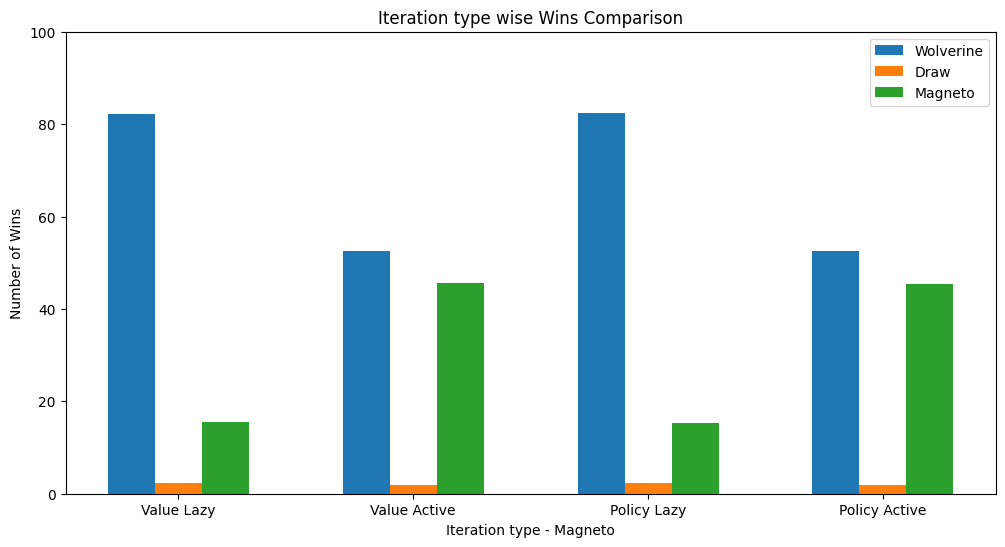

In [44]:
import matplotlib.pyplot as plt

wolverine = [trial_results_1[0], trial_results_2[0], trial_results_3[0], trial_results_4[0]]
draw = [trial_results_1[1], trial_results_2[1], trial_results_3[1], trial_results_4[1]]
magneto = [trial_results_1[2], trial_results_2[2], trial_results_3[2], trial_results_4[2]]

itn = ['Value Lazy', 'Value Active', 'Policy Lazy', 'Policy Active']

bar_width = 0.2
bar_positions = np.arange(4)

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(bar_positions - bar_width, wolverine, bar_width, label='Wolverine')
bars2 = ax.bar(bar_positions, draw, bar_width, label='Draw')
bars3 = ax.bar(bar_positions + bar_width, magneto, bar_width, label='Magneto')

ax.set_xlabel('Iteration type - Magneto')
ax.set_ylabel('Number of Wins')
ax.set_title('Iteration type wise Wins Comparison')
ax.set_xticks(bar_positions)
ax.set_xticklabels(itn)
ax.legend()

plt.ylim(bottom=0, top=100)
plt.show()

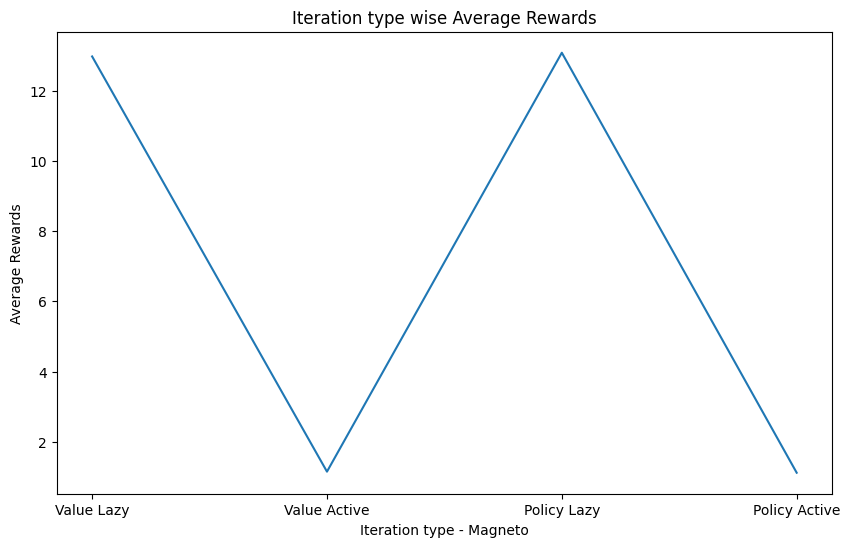

In [45]:
import matplotlib.pyplot as plt

avg_rewards = [trial_rewards_1[1], trial_rewards_2[1], trial_rewards_3[1], trial_rewards_4[1]]
itn = ['Value Lazy', 'Value Active', 'Policy Lazy', 'Policy Active']

plt.figure(figsize=(10, 6))
plt.plot(itn, avg_rewards)
plt.xlabel('Iteration type - Magneto')
plt.ylabel('Average Rewards')
plt.title('Iteration type wise Average Rewards')
plt.show()

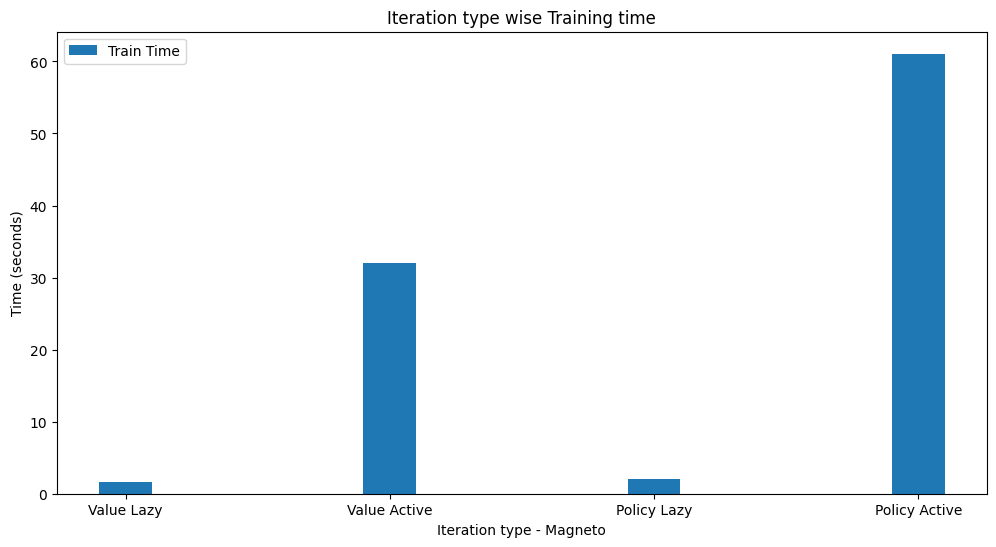

In [46]:
import matplotlib.pyplot as plt

train_time = [trial_rewards_1[0], trial_rewards_2[0], trial_rewards_3[0], trial_rewards_4[0]]
itn = ['Value Lazy', 'Value Active', 'Policy Lazy', 'Policy Active']

bar_width = 0.2
bar_positions = np.arange(4)

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(bar_positions, train_time, bar_width, label='Train Time')

ax.set_xlabel('Iteration type - Magneto')
ax.set_ylabel('Time (seconds)')
ax.set_title('Iteration type wise Training time')
ax.set_xticks(bar_positions)
ax.set_xticklabels(itn)
ax.legend()

plt.show()


## Results & Comparisons

1. Value iteration for lazy Magneto has the fastest training time and high win rate for wolverine. Similarly Policy iteraion for lazy Magneto has relatively fast training time compared to that for Value and Policy iteration for active Magnetos.

2. Active Magneto has a higher win rate compared to that of lazy Magneto for both Value and Policy iterations. This shows that active Magneto is more effective as it follows and tries to capture the wolverine thus reducing the reward.

3. Average rewards are more for Lazy Magneto as wolverine has a higher win rate resulting in increasing the reward.

4. Policy iteration for active Magneto has the highest training time but the lowest wolverine win rate.

5. Considering the above points and wanting to increase the wolverine win rate, Value iteration for lazy Magneto gets us the best results, i.e. hight win rate and also low training time.

NOTE: All the games were run 100,000 times and results are averaged.